In [101]:
import git
from pathlib import Path
import os

ROOT_DIR = Path(git.Repo('.', search_parent_directories=True).working_tree_dir)
os.chdir(os.path.join(ROOT_DIR, "utilities"))
from testing import * # If MATLAB is not installed, open utilities and set to False
from plotting import *
np.random.seed(0)


In [102]:
SAVE_FIGS = True
plots_path = os.path.join(ROOT_DIR, "publication", "paper", "draft_plots")

In [103]:
r_shade_roi = np.linspace(0.01, 4, 100)
eta_shade_roi = np.linspace(-0.1, 0.1, 100)
beta_shade_roi = (eta_shade_roi + 1.5)/r_shade_roi
r_roi_mesh, eta_roi_mesh = np.meshgrid(r_shade_roi, eta_shade_roi)
beta_roi_mesh = (eta_roi_mesh + 1.5) / r_roi_mesh
roi_points = np.column_stack([r_roi_mesh.ravel(), (1 / beta_roi_mesh).ravel()])
roi_hull = ConvexHull(roi_points)



# Pastis

In [104]:
DATA_SET = "pastis"

## Wavelet

In [105]:
kind = "layer"
all_hulls_df = pd.DataFrame(columns=["BAND", "hull", "CHANNEL", "DIRECTION"])
for DIRECTION in ["horizVert", "diagonal"]:
    for CHANNEL in ["gray", "blue", "green", "red"]:
        DATA_NAME = f'{DATA_SET}-full' 
        TRANSFORM = f'wavelet-{DIRECTION}'
        CHANNEL = CHANNEL

        path_list = DATA_NAME.split("-") + TRANSFORM.split("-")
        
        if CHANNEL:
            path_list.append(CHANNEL)
        print(path_list)
        ROOT_DIR = Path(git.Repo('.', search_parent_directories=True).working_tree_dir)
        CWD = os.path.join(ROOT_DIR, "results", "case-studies", *path_list)


        DICT_PATH = os.path.join(CWD, "cache", "rEtaKsstats_dict.pickle")
        MASTERDF_DIR = os.path.join(CWD, "CSVs", "master_df.csv")
        rEtaKsstats_dict = pd.read_pickle(DICT_PATH)
        master_df = pd.read_csv(MASTERDF_DIR)
        master_df = master_df.set_index("layer")
        master_df
        hulls_df = region_reporting(rEtaKsstats_dict, master_df, layer = "all", MULT =1.2, kind = kind, plots=False, plot_name = "-".join(path_list))
        hulls_df["CHANNEL"] = CHANNEL
        hulls_df["DIRECTION"] = DIRECTION
        all_hulls_df = pd.concat([all_hulls_df, hulls_df], ignore_index=True)
all_hulls_df = all_hulls_df.reset_index(drop=True)
all_hulls_df

['pastis', 'full', 'wavelet', 'horizVert', 'gray']
['r_optimize', 'eta_optimize', 'ksstat_exclude_plus0']
0.02191685263973091 0.0240303354829301
Rational Function Parameters: a=1.086603452553006, b=-0.3768455584680505, c=0.03129102787912446, d=1.1977031051230465, e=0.0027244127757265492
Quadratic Function Parameters: a=-0.0011166350686364623, b=0.9156949689774035, c=-0.2748016768718087
Linear Function Parameters: m=0.9000089157987352, c=-0.24856694727201312
['r_optimize', 'eta_optimize', 'ksstat_exclude_plus0']
0.005448360126818086 0.0120285145061138
Rational Function Parameters: a=102.77623302192568, b=-11.94502134281893, c=0.2908327091237204, d=92.05296445921654, e=47.54869873286287
Quadratic Function Parameters: a=0.002911347419100152, b=1.0429591290143756, c=-0.29843032529999247
Linear Function Parameters: m=1.0819021879154271, c=-0.35264284814246283
['r_optimize', 'eta_optimize', 'ksstat_exclude_minus25']
0.005793421327869774 0.0060175634983601
Layer 4: None Passed
Rational Functi

BAND                                               hull CHANNEL  DIRECTION
0     2  [[20.000966768011168, 16.667174734576058], [19...    gray  horizVert
1     3  [[7.7008188393726, 6.4168071625741065], [20.00...    gray  horizVert
2     4  [[1.6998266497916228, 1.7012312535595933], [5....    gray  horizVert
3     5  [[2.7007588295490232, 3.856432926901788], [19....    gray  horizVert
4     6  [[0.7013037877009644, 0.7780350130961139], [1....    gray  horizVert
5     7  [[0.4000496852159366, 0.39839815124641215], [0...    gray  horizVert
6     8  [[0.09871026865145731, 0.031840259007887034], ...    gray  horizVert
7     2  [[20.00300605155315, 13.333404476044059], [19....    blue  horizVert
8     3  [[20.00082980765626, 19.999510351800055], [20....    blue  horizVert
9     4  [[19.999379661196727, 24.99986471366916], [19....    blue  horizVert
10    5  [[2.8000269727892575, 3.9994964571676], [20.00...    blue  horizVert
11    6  [[0.799137865710981, 1.3564429386199024], [0.0...    blue  horizVert
12    7  [[0.7009127832444803, 1.1671084531828586], [0....    blue  horizVert
13    8  [[0.300336730793336, 0.27407705847118763], [0....    blue  horizVert
14    2  [[20.001110378845894, 18.181775626219753], [19...   green  horizVert
15    3  [[20.001789940104484, 20.000798013524726], [19...   green  horizVert
16    4  [[2.30014999482437, 2.555351717578082], [4.500...   green  horizVert
17    5  [[1.7987939291532942, 2.248157298632659], [2.8...   green  horizVert
18    6  [[0.8998751159386161, 1.125366967202429], [1.8...   green  horizVert
19    7  [[0.09932790441472866, 0.028995291274582956], ...   green  horizVert
20    8  [[0.08949133778628236, 0.02704076396290204], [...   green  horizVert
21    2  [[9.90059443652955, 9.000659182109342], [19.99...     red  horizVert
22    3  [[19.999748960575566, 19.99928604367576], [19....     red  horizVert
23    4  [[1.2991125757599775, 1.626086863749404], [0.0...     red  horizVert
24    5  [[1.2992562712197564, 1.6257625655914165], [4....     red  horizVert
25    6  [[0.09817195266408726, 0.025698091682454616], ...     red  horizVert
26    7  [[0.09914479932116857, 0.028770907836942198], ...     red  horizVert
27    8  [[0.5005581198407248, 0.6263076290502873], [0....     red  horizVert
28    2  [[20.002715776400052, 2.6654964979016462], [20...    gray   diagonal
29    3  [[20.001786469949455, 19.999450057640814], [19...    gray   diagonal
30    4  [[20.00079574270965, 22.223628437129506], [20....    gray   diagonal
31    5  [[19.99959803407442, 28.57101910061515], [19.9...    gray   diagonal
32    6  [[1.4004301682636846, 2.000434818750035], [2.5...    gray   diagonal
33    7  [[0.9002472599720954, 1.5010853878788493], [0....    gray   diagonal
34    8  [[0.0901359184877656, 0.021835007772390745], [...    gray   diagonal
35    2  [[20.00272449880973, 22.222878520827077], [19....    blue   diagonal
36    3  [[20.001169869044517, 16.66755935989354], [20....    blue   diagonal
37    4  [[19.998568191200658, 22.222953880853755], [20...    blue   diagonal
38    5  [[19.999649956536818, 28.570866395533244], [20...    blue   diagonal
39    6  [[0.2988881489236729, 0.18984231664216097], [0...    blue   diagonal
40    7  [[0.19870031478581923, 0.10446013771079492], [...    blue   diagonal
41    8  [[0.6009269423148567, 0.7485111506134068], [0....    blue   diagonal
42    2  [[20.002033050326016, 18.18140341885721], [20....   green   diagonal
43    3  [[20.00152332079038, 18.18129046955852], [20.0...   green   diagonal
44    4  [[20.000205659661614, 22.22152434404161], [19....   green   diagonal
45    5  [[4.40114489537632, 5.498816956753016], [19.99...   green   diagonal
46    6  [[1.5988148718771849, 2.6661359520292596], [0....   green   diagonal
47    7  [[0.5007082380989714, 0.5002385789434819], [0....   green   diagonal
48    8  [[0.7008887093981948, 0.873823953133056], [0.0...   green   diagonal
49    2  [[20.000290871209813, 28.571775917827225], [19...     red   diagonal
50    3  [[20.00138872768

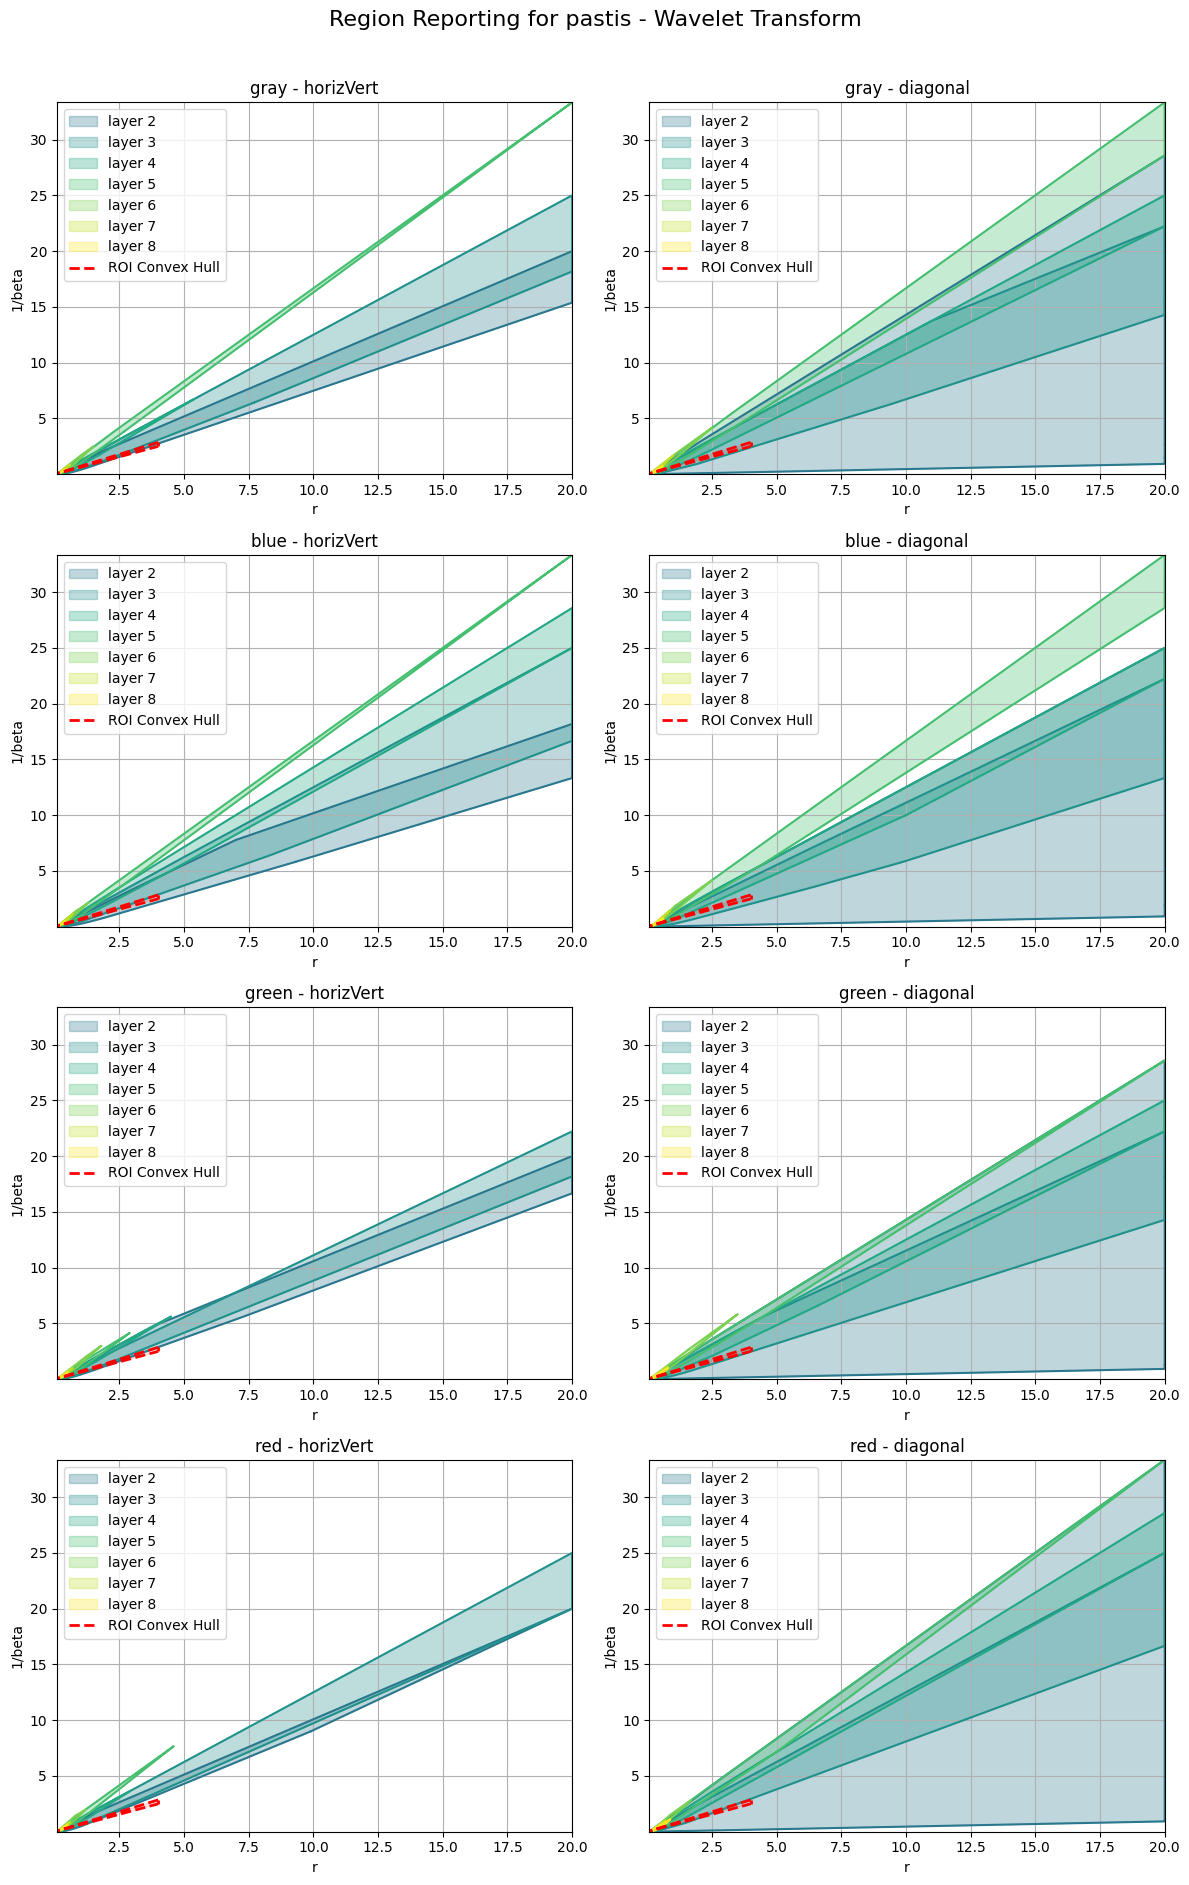

In [106]:
# Find global min/max for all hulls
all_points = np.concatenate([np.array(hull).reshape(-1, 2) for hull in all_hulls_df['hull']])
x_min, x_max = all_points[:, 0].min(), all_points[:, 0].max()
y_min, y_max = all_points[:, 1].min(), all_points[:, 1].max()

channels = all_hulls_df["CHANNEL"].unique()
directions = all_hulls_df["DIRECTION"].unique()

fig, axes = plt.subplots(len(channels), len(directions), figsize=(6 * len(directions), 5 * len(channels)), squeeze=False)

for i, channel in enumerate(channels):
    for j, direction in enumerate(directions):
        ax = axes[i, j]
        subset = all_hulls_df[(all_hulls_df["CHANNEL"] == channel) & (all_hulls_df["DIRECTION"] == direction)]
        if subset.empty:
            ax.set_title(f"{channel} - {direction}\n(No Data)")
            ax.axis('off')
            continue
        max_band = subset["BAND"].astype(int).max()
        colors = plt.cm.viridis(np.linspace(0.3, 1, max_band))
        for _, row in subset.iterrows():
            BAND = int(row['BAND'])
            hull = np.array(row['hull'])
            color = colors[BAND - 1]
            ax.fill(hull[:, 0], hull[:, 1], color=color, alpha=0.3, label=f'{kind} {BAND}')
            ax.plot(hull[:, 0], hull[:, 1], color=color)
            ax.plot([hull[-1, 0], hull[0, 0]], [hull[-1, 1], hull[0, 1]], color=color)

        
        
        #ADD ROI
        ax.plot(roi_points[roi_hull.vertices, 0], roi_points[roi_hull.vertices, 1], 'r--', lw=2, label='ROI Convex Hull')
        ax.fill(roi_points[roi_hull.vertices, 0], roi_points[roi_hull.vertices, 1], color='red', alpha=0.1)
        ax.plot([roi_points[roi_hull.vertices[-1], 0], roi_points[roi_hull.vertices[0], 0]],
                 [roi_points[roi_hull.vertices[-1], 1], roi_points[roi_hull.vertices[0], 1]],'r--', lw=2)

        
        ax.set_title(f"{channel} - {direction}")
        ax.set_xlabel('r')
        ax.set_ylabel('1/beta')
        ax.legend()
        ax.grid()
        ax.set_xlim(x_min, x_max)
        ax.set_ylim(y_min, y_max)

plt.suptitle(f"Region Reporting for {DATA_SET} - Wavelet Transform", fontsize=16, y=0.94)
plt.tight_layout(rect=[0, 0, 1, 0.93])
plt.show()
if SAVE_FIGS:
    save_path = os.path.join(plots_path, f"Region Reporting for {DATA_SET} - Wavelet Transform.jpg")
    fig.savefig(save_path, dpi=600, bbox_inches='tight')


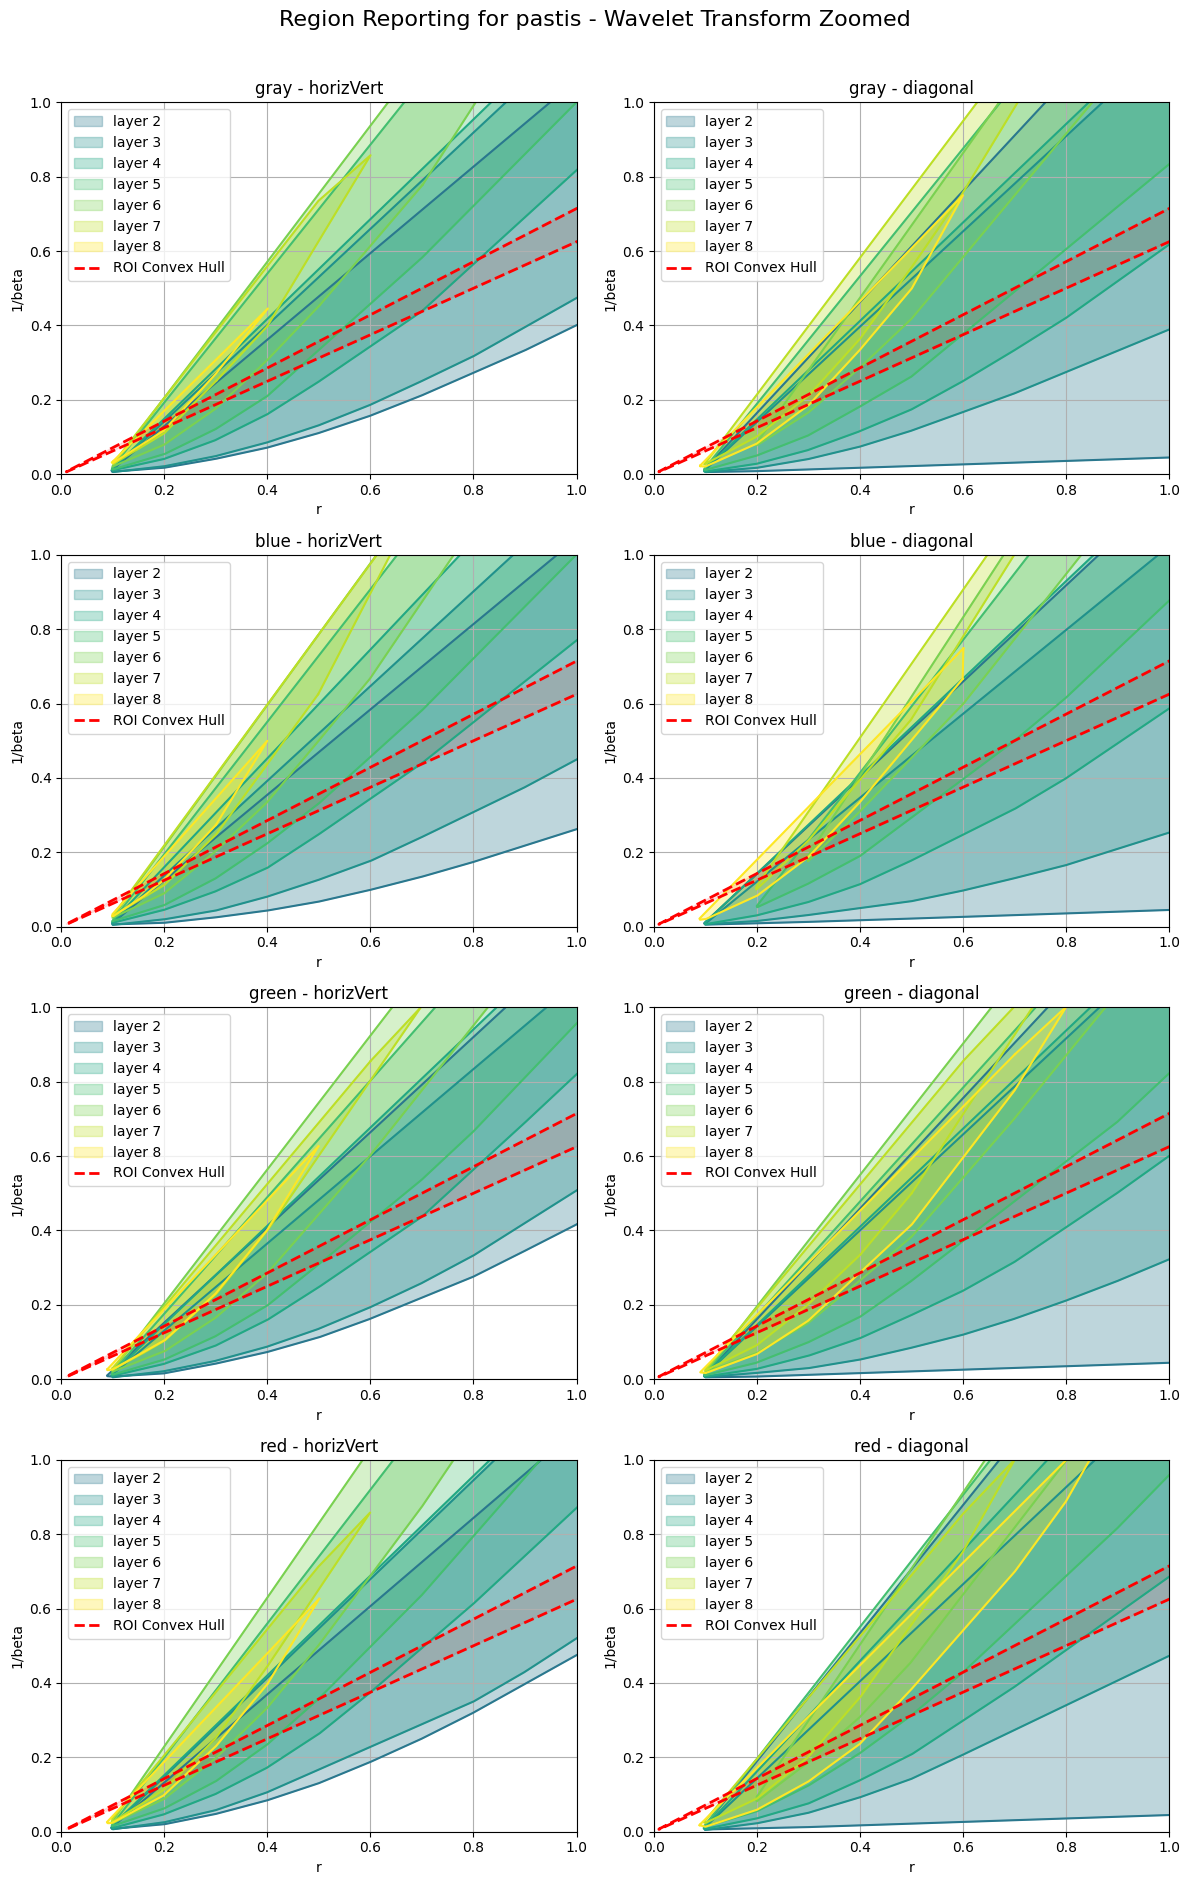

In [107]:
# Find global min/max for all hulls
all_points = np.concatenate([np.array(hull).reshape(-1, 2) for hull in all_hulls_df['hull']])
x_min, x_max = all_points[:, 0].min(), all_points[:, 0].max()
y_min, y_max = all_points[:, 1].min(), all_points[:, 1].max()

channels = all_hulls_df["CHANNEL"].unique()
directions = all_hulls_df["DIRECTION"].unique()

fig, axes = plt.subplots(len(channels), len(directions), figsize=(6 * len(directions), 5 * len(channels)), squeeze=False)

for i, channel in enumerate(channels):
    for j, direction in enumerate(directions):
        ax = axes[i, j]
        subset = all_hulls_df[(all_hulls_df["CHANNEL"] == channel) & (all_hulls_df["DIRECTION"] == direction)]
        if subset.empty:
            ax.set_title(f"{channel} - {direction}\n(No Data)")
            ax.axis('off')
            continue
        max_band = subset["BAND"].astype(int).max()
        colors = plt.cm.viridis(np.linspace(0.3, 1, max_band))
        for _, row in subset.iterrows():
            BAND = int(row['BAND'])
            hull = np.array(row['hull'])
            color = colors[BAND - 1]
            ax.fill(hull[:, 0], hull[:, 1], color=color, alpha=0.3, label=f'{kind} {BAND}')
            ax.plot(hull[:, 0], hull[:, 1], color=color)
            ax.plot([hull[-1, 0], hull[0, 0]], [hull[-1, 1], hull[0, 1]], color=color)
        
        #ADD ROI
        ax.plot(roi_points[roi_hull.vertices, 0], roi_points[roi_hull.vertices, 1], 'r--', lw=2, label='ROI Convex Hull')
        ax.fill(roi_points[roi_hull.vertices, 0], roi_points[roi_hull.vertices, 1], color='red', alpha=0.1)
        ax.plot([roi_points[roi_hull.vertices[-1], 0], roi_points[roi_hull.vertices[0], 0]],
                 [roi_points[roi_hull.vertices[-1], 1], roi_points[roi_hull.vertices[0], 1]],'r--', lw=2)
        

        ax.set_title(f"{channel} - {direction}")
        ax.set_xlabel('r')
        ax.set_ylabel('1/beta')
        ax.legend()
        ax.grid()
        ax.set_xlim(0, 1)
        ax.set_ylim(0, 1)

plt.suptitle(f"Region Reporting for {DATA_SET} - Wavelet Transform Zoomed", fontsize=16, y=0.94)
plt.tight_layout(rect=[0, 0, 1, 0.93])
plt.show()

if SAVE_FIGS:
    save_path = os.path.join(plots_path, f"Region Reporting for {DATA_SET} - Wavelet Transform Zoomed.jpg")
    fig.savefig(save_path, dpi=600, bbox_inches='tight')


## Fourier

In [108]:
kind = "band"
all_hulls_df = pd.DataFrame(columns=["BAND", "hull", "CHANNEL"])
for CHANNEL in ["gray", "blue", "green", "red"]:
    DATA_NAME = f'{DATA_SET}-full' 
    TRANSFORM = f'fourier'
    CHANNEL = CHANNEL

    path_list = DATA_NAME.split("-") + TRANSFORM.split("-")
    
    if CHANNEL:
        path_list.append(CHANNEL)
    print(path_list)
    ROOT_DIR = Path(git.Repo('.', search_parent_directories=True).working_tree_dir)
    CWD = os.path.join(ROOT_DIR, "results", "case-studies", *path_list)


    DICT_PATH = os.path.join(CWD, "cache", "rEtaKsstats_dict.pickle")
    MASTERDF_DIR = os.path.join(CWD, "CSVs", "master_df.csv")
    rEtaKsstats_dict = pd.read_pickle(DICT_PATH)
    master_df = pd.read_csv(MASTERDF_DIR)
    master_df = master_df.set_index(kind)
    master_df
    hulls_df = region_reporting(rEtaKsstats_dict, master_df, layer = "all", kind = kind, MULT =1.2, plots=False, plot_name = "-".join(path_list))
    hulls_df["CHANNEL"] = CHANNEL
    all_hulls_df = pd.concat([all_hulls_df, hulls_df], ignore_index=True)
all_hulls_df = all_hulls_df.reset_index(drop=True)
all_hulls_df

['pastis', 'full', 'fourier', 'gray']
['r_optimize', 'eta_optimize', 'ksstat_exclude_plus0']
0.004159327211190278 0.0076105772670922
Layer 2: None Passed
Rational Function Parameters: a=0.6123190363121405, b=17.234569199280145, c=-6.390405059051909, d=0.127160241150516, e=33.51385201720509
Quadratic Function Parameters: a=0.014890638154803959, b=0.5230205039823084, c=-0.19803192711023754
Linear Function Parameters: m=0.6995044525555584, c=-0.47784964153661025
['r_optimize', 'eta_optimize', 'ksstat_exclude_plus0']
0.003070093253045947 0.0066754871311422
Layer 5: None Passed
Rational Function Parameters: a=0.22879086816860217, b=4.471287391500629, c=-0.8539373843648088, d=-0.09239156338044838, e=14.75318098032173
Quadratic Function Parameters: a=0.020458295085643452, b=0.28395912414324576, c=-0.037281426009762475
Linear Function Parameters: m=0.5156320715501868, c=-0.42148503910033663
['r_optimize', 'eta_optimize', 'ksstat_exclude_plus0']
0.003837364835219259 0.0052529256547175
Layer 8: 

BAND                                               hull CHANNEL
0     2  [[20.000992613583964, 15.383730583045757], [19...    gray
1     5  [[20.001007083317138, 5.713762255942495], [20....    gray
2     8  [[19.999514016545746, 7.999038094181578], [20....    gray
3    11  [[19.99994439847426, 5.715950325321736], [20.0...    gray
4    14  [[20.000362282811533, 14.28553628387711], [19....    gray
5    17  [[20.0016112653814, 13.3336554493309], [19.999...    gray
6    20  [[20.00073504380235, 7.999939446799645], [20.0...    gray
7    23  [[20.001291590588327, 18.182520946960175], [20...    gray
8    26  [[20.0014016729431, 18.18130779543463], [19.99...    gray
9    29  [[20.000737814222862, 15.384105936758898], [20...    gray
10   32  [[20.000880259126543, 13.334218242790918], [20...    gray
11    2  [[20.00079770838435, 15.386714092147887], [19....    blue
12    5  [[20.001364538819484, 5.714606696991316], [20....    blue
13    8  [[20.001063686519156, 4.44604916007941], [20.0...    blue
14   11  [[20.001503856523094, 14.285867947480533], [20...    blue
15   14  [[20.000564698619087, 8.000626514369472], [20....    blue
16   17  [[20.002139724128615, 7.999633797014521], [20....    blue
17   20  [[9.799983255138946, 3.0629697714282416], [20....    blue
18   23  [[20.00323398886834, 18.182993020835617], [19....    blue
19   26  [[20.000548672840896, 18.182682896951814], [20...    blue
20   29  [[20.000115241479303, 18.18200921635986], [19....    blue
21   32  [[19.998878744480365, 15.384808470482461], [19...    blue
22    2  [[20.00078799526616, 14.28577111293834], [20.0...   green
23    5  [[19.999781429632762, 5.71364010613328], [20.0...   green
24    8  [[16.00030157115957, 4.570783817812663], [20.0...   green
25   11  [[20.002275437944444, 14.28571473018234], [19....   green
26   14  [[19.999636160209395, 5.713058211503343], [20....   green
27   17  [[10.000572884847793, 2.856801944953934], [20....   green
28   20  [[19.998795758943753, 7.998103619735519], [20....   green
29   23  [[19.998699220033817, 8.00186967252269], [20.0...   green
30   26  [[20.002063956219562, 16.66471141676958], [20....   green
31   29  [[20.000803651117277, 14.284365005941636], [20...   green
32   32  [[19.999209136389226, 4.445095888781772], [20....   green
33    2  [[19.99921372093996, 13.331953361663878], [20....     red
34    5  [[20.0019548134692, 13.333694071207582], [20.0...     red
35    8  [[3.9001828716196196, 3.5469035910161493], [0....     red
36   11  [[20.00035457655943, 8.000619059532148], [20.0...     red
37   14  [[20.002214438112624, 14.286581186729363], [19...     red
38   17  [[20.00139851661938, 7.999511175356495], [20.0...     red
39   20  [[20.00016251952615, 8.001277421250533], [20.0...     red
40   23  [[20.00036188705639, 16.666848069508475], [20....     red
41   26  [[20.001060921704912, 18.182222064136297], [20...     red
42   29  [[9.900544069745713, 4.125251613006693], [20.0...     red
43   32  [[20.000955490294047, 5.713569077897658], [20....     red

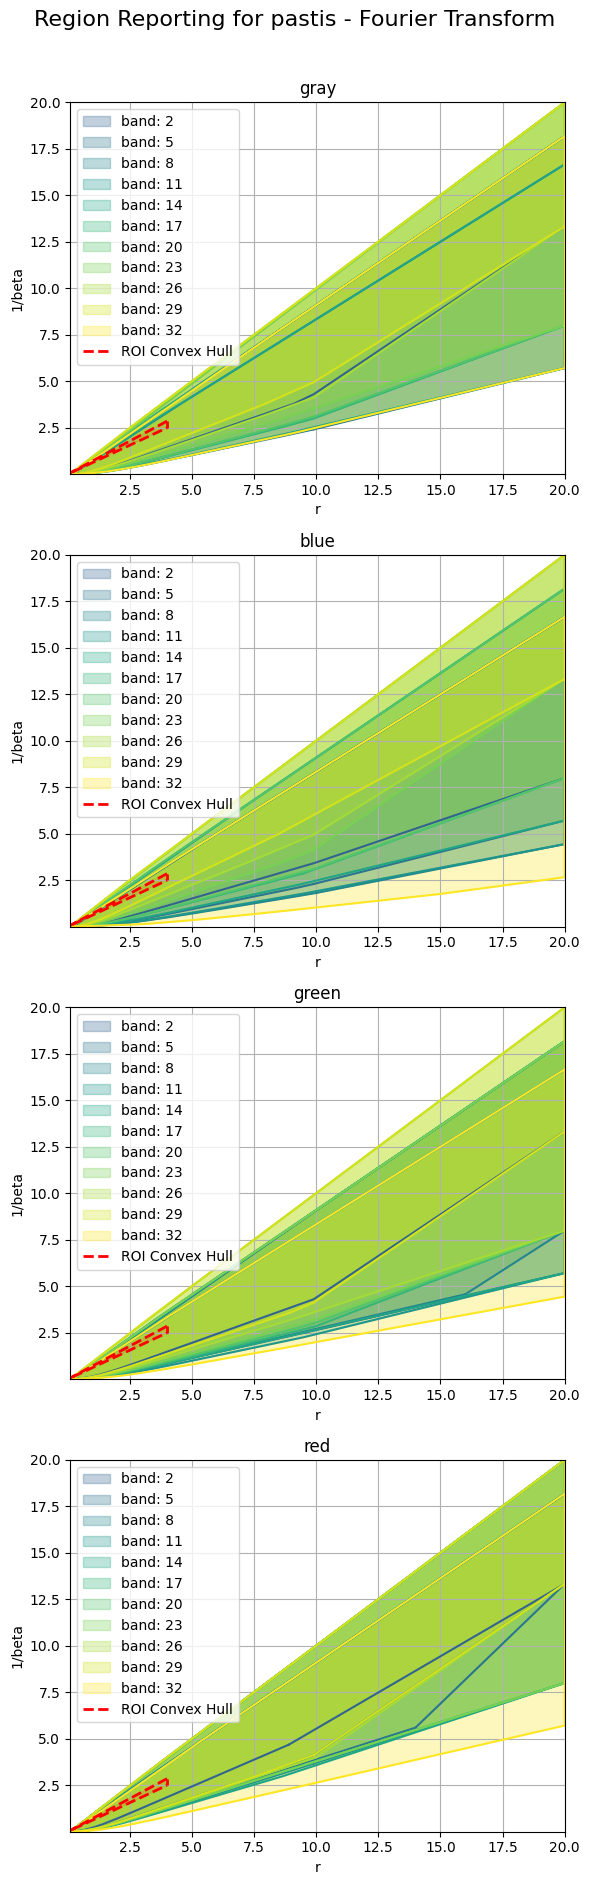

In [109]:
# Find global min/max for all hulls
all_points = np.concatenate([np.array(hull).reshape(-1, 2) for hull in all_hulls_df['hull']])
x_min, x_max = all_points[:, 0].min(), all_points[:, 0].max()
y_min, y_max = all_points[:, 1].min(), all_points[:, 1].max()

channels = all_hulls_df["CHANNEL"].unique()

fig, axes = plt.subplots(len(channels), 1, figsize=(6, 5 * len(channels)), squeeze=False)

for i, channel in enumerate(channels):
    ax = axes[i, 0]
    subset = all_hulls_df[all_hulls_df["CHANNEL"] == channel]
    if subset.empty:
        ax.set_title(f"{channel}\n(No Data)")
        ax.axis('off')
        continue
    max_band = subset["BAND"].astype(int).max()
    colors = plt.cm.viridis(np.linspace(0.3, 1, max_band))
    for _, row in subset.iterrows():
        BAND = int(row['BAND'])
        hull = np.array(row['hull'])
        color = colors[BAND - 1]
        ax.fill(hull[:, 0], hull[:, 1], color=color, alpha=0.3, label=f'{kind}: {BAND}')
        ax.plot(hull[:, 0], hull[:, 1], color=color)
        ax.plot([hull[-1, 0], hull[0, 0]], [hull[-1, 1], hull[0, 1]], color=color)
    #ADD ROI
    ax.plot(roi_points[roi_hull.vertices, 0], roi_points[roi_hull.vertices, 1], 'r--', lw=2, label='ROI Convex Hull')
    ax.fill(roi_points[roi_hull.vertices, 0], roi_points[roi_hull.vertices, 1], color='red', alpha=0.1)
    ax.plot([roi_points[roi_hull.vertices[-1], 0], roi_points[roi_hull.vertices[0], 0]],
                [roi_points[roi_hull.vertices[-1], 1], roi_points[roi_hull.vertices[0], 1]],'r--', lw=2)

    ax.set_title(f"{channel}")
    ax.set_xlabel('r')
    ax.set_ylabel('1/beta')
    ax.legend()
    ax.grid()
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)

plt.suptitle(f"Region Reporting for {DATA_SET} - Fourier Transform", fontsize=16, y=0.94)
plt.tight_layout(rect=[0, 0, 1, 0.93])
plt.show()

if SAVE_FIGS:
    save_path = os.path.join(plots_path, f"Region Reporting for {DATA_SET} - Fourier Transform.jpg")
    fig.savefig(save_path, dpi=600, bbox_inches='tight')


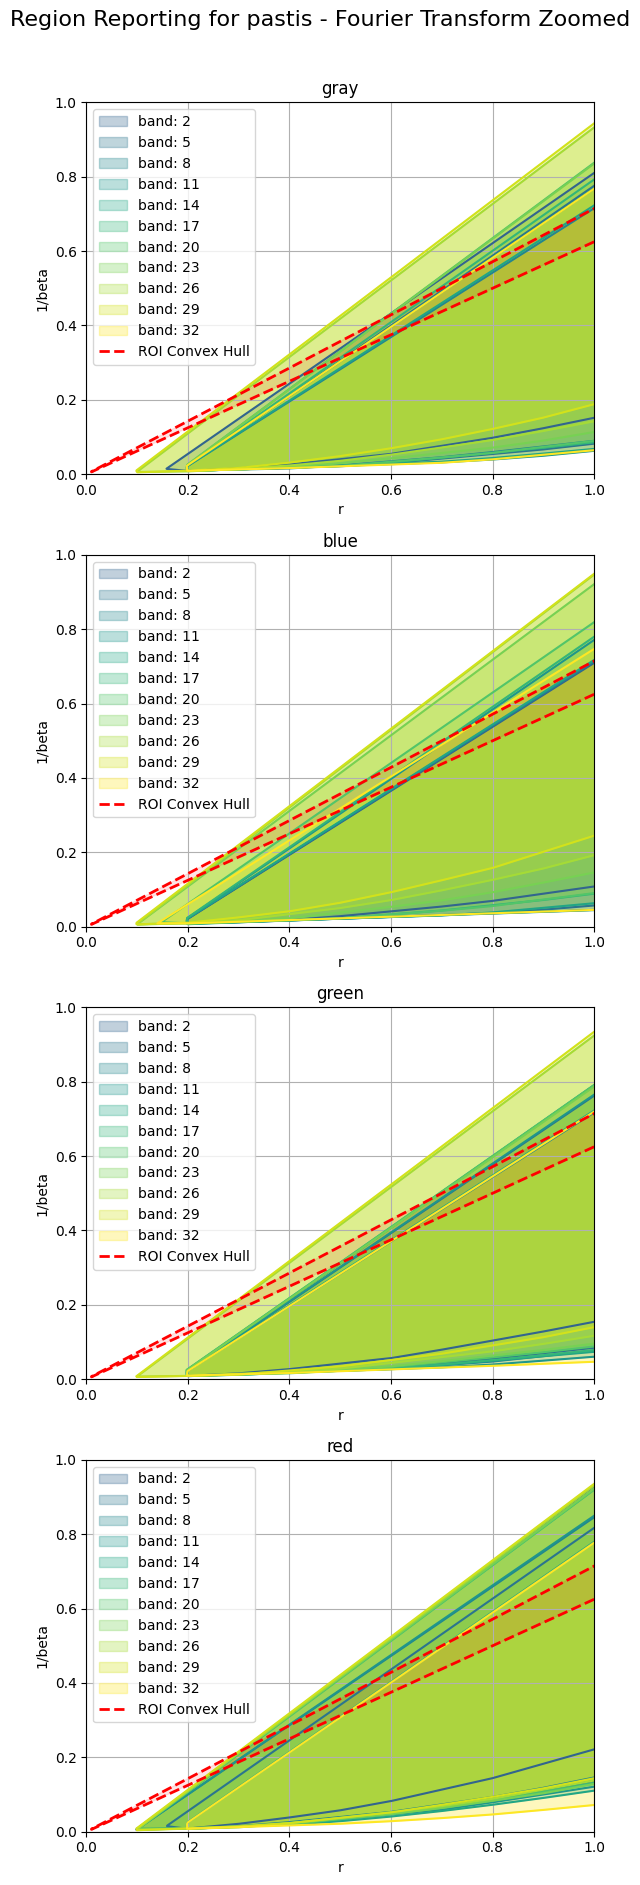

In [110]:
# Find global min/max for all hulls
all_points = np.concatenate([np.array(hull).reshape(-1, 2) for hull in all_hulls_df['hull']])
x_min, x_max = all_points[:, 0].min(), all_points[:, 0].max()
y_min, y_max = all_points[:, 1].min(), all_points[:, 1].max()

channels = all_hulls_df["CHANNEL"].unique()

fig, axes = plt.subplots(len(channels), 1, figsize=(6, 5 * len(channels)), squeeze=False)

for i, channel in enumerate(channels):
    ax = axes[i, 0]
    subset = all_hulls_df[all_hulls_df["CHANNEL"] == channel]
    if subset.empty:
        ax.set_title(f"{channel}\n(No Data)")
        ax.axis('off')
        continue
    max_band = subset["BAND"].astype(int).max()
    colors = plt.cm.viridis(np.linspace(0.3, 1, max_band))
    for _, row in subset.iterrows():
        BAND = int(row['BAND'])
        hull = np.array(row['hull'])
        color = colors[BAND - 1]
        ax.fill(hull[:, 0], hull[:, 1], color=color, alpha=0.3, label=f'{kind}: {BAND}')
        ax.plot(hull[:, 0], hull[:, 1], color=color)
        ax.plot([hull[-1, 0], hull[0, 0]], [hull[-1, 1], hull[0, 1]], color=color)
    #ADD ROI
    ax.plot(roi_points[roi_hull.vertices, 0], roi_points[roi_hull.vertices, 1], 'r--', lw=2, label='ROI Convex Hull')
    ax.fill(roi_points[roi_hull.vertices, 0], roi_points[roi_hull.vertices, 1], color='red', alpha=0.1)
    ax.plot([roi_points[roi_hull.vertices[-1], 0], roi_points[roi_hull.vertices[0], 0]],
                [roi_points[roi_hull.vertices[-1], 1], roi_points[roi_hull.vertices[0], 1]],'r--', lw=2)

    ax.set_title(f"{channel}")
    ax.set_xlabel('r')
    ax.set_ylabel('1/beta')
    ax.legend()
    ax.grid()
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)

plt.suptitle(f"Region Reporting for {DATA_SET} - Fourier Transform Zoomed", fontsize=16, y=0.94)
plt.tight_layout(rect=[0, 0, 1, 0.93])
plt.show()

if SAVE_FIGS:
    save_path = os.path.join(plots_path, f"Region Reporting for {DATA_SET} - Fourier Transform.jpg")
    fig.savefig(save_path, dpi=600, bbox_inches='tight')


# AgriVision

In [111]:
DATA_SET = "AgriVision"

## Wavelet

In [112]:
kind = "layer"
all_hulls_df = pd.DataFrame(columns=["BAND", "hull", "CHANNEL", "DIRECTION"])
for DIRECTION in ["horizVert", "diagonal"]:
    for CHANNEL in ["gray", "blue", "green", "red"]:
        DATA_NAME = f'{DATA_SET}-full' 
        TRANSFORM = f'wavelet-{DIRECTION}'
        CHANNEL = CHANNEL

        path_list = DATA_NAME.split("-") + TRANSFORM.split("-")
        
        if CHANNEL:
            path_list.append(CHANNEL)
        print(path_list)
        ROOT_DIR = Path(git.Repo('.', search_parent_directories=True).working_tree_dir)
        CWD = os.path.join(ROOT_DIR, "results", "case-studies", *path_list)


        DICT_PATH = os.path.join(CWD, "cache", "rEtaKsstats_dict.pickle")
        MASTERDF_DIR = os.path.join(CWD, "CSVs", "master_df.csv")
        rEtaKsstats_dict = pd.read_pickle(DICT_PATH)
        master_df = pd.read_csv(MASTERDF_DIR)
        master_df = master_df.set_index("layer")
        master_df
        hulls_df = region_reporting(rEtaKsstats_dict, master_df, layer = "all", MULT =1.2, kind = kind, plots=False, plot_name = "-".join(path_list))
        hulls_df["CHANNEL"] = CHANNEL
        hulls_df["DIRECTION"] = DIRECTION
        all_hulls_df = pd.concat([all_hulls_df, hulls_df], ignore_index=True)
all_hulls_df = all_hulls_df.reset_index(drop=True)
all_hulls_df

['AgriVision', 'full', 'wavelet', 'horizVert', 'gray']
['r_optimize', 'eta_optimize', 'ksstat_exclude_plus0']
0.01479486153822962 0.014296961166644
Layer 2: None Passed
Rational Function Parameters: a=2855.8978170622777, b=-434.71793677550176, c=16.475681723901925, d=3683.869109143692, e=-310.3163086414752
Quadratic Function Parameters: a=2.0233976142280743, b=0.14340823022065022, c=-0.006975576651621177
Linear Function Parameters: m=0.7442276893924694, c=-0.046595843753634514
['r_optimize', 'eta_optimize', 'ksstat_exclude_plus0']
0.013374418528451315 0.0071531615485336
Layer 3: None Passed
Rational Function Parameters: a=6.337156984912588, b=-0.11726387888135228, c=-0.0013833152206869882, d=2.5024897240388633, e=1.3843429490775054
Quadratic Function Parameters: a=1.9446737957921885, b=0.31843108981117857, c=-0.020417615154341713
Linear Function Parameters: m=1.033085416274884, c=-0.07310615745606702
['r_optimize', 'eta_optimize', 'ksstat_exclude_plus0']
0.010461798535892434 0.00357774

BAND                                               hull CHANNEL  DIRECTION
0     2  [[0.19987865422107504, 0.10585250499928253], [...    gray  horizVert
1     3  [[0.08908036091747665, 0.024626460925329118], ...    gray  horizVert
2     4  [[0.1115179319840173, 0.03889508083201055], [0...    gray  horizVert
3     5  [[0.19965341482804036, 0.11864528265189163], [...    gray  horizVert
4     6  [[0.3997233627300593, 0.332770997916321], [0.0...    gray  horizVert
..  ...                                                ...     ...        ...
67    6  [[0.08960999000942148, 0.01676184077884153], [...     red   diagonal
68    7  [[0.08862822073158134, 0.017149102117649598], ...     red   diagonal
69    8  [[0.9001966399914447, 1.2863191143577821], [0....     red   diagonal
70    9  [[0.7008135395124053, 0.8772802133796083], [0....     red   diagonal
71   10  [[0.29855126388776626, 0.21357776197181216], [...     red   diagonal

[72 rows x 4 columns]

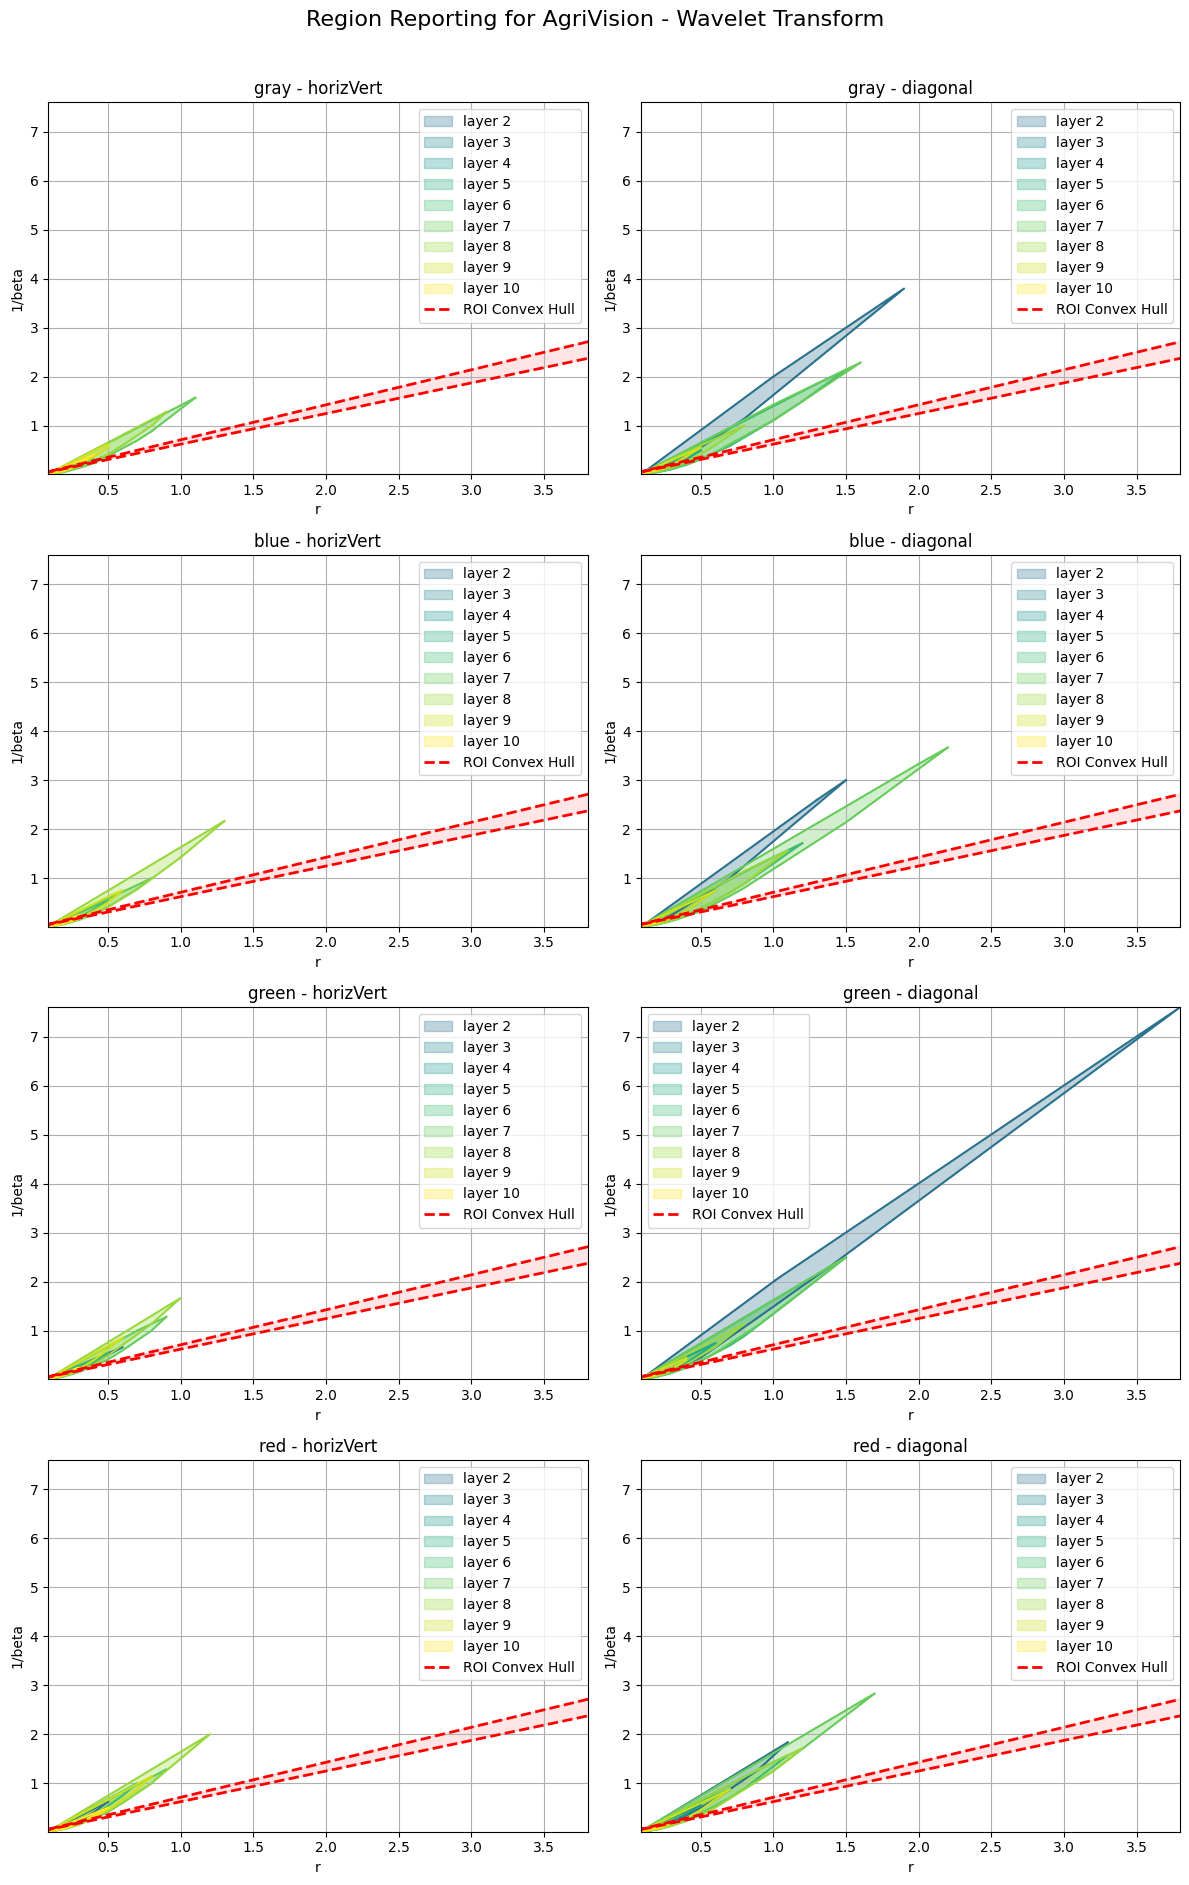

In [113]:
# Find global min/max for all hulls
all_points = np.concatenate([np.array(hull).reshape(-1, 2) for hull in all_hulls_df['hull']])
x_min, x_max = all_points[:, 0].min(), all_points[:, 0].max()
y_min, y_max = all_points[:, 1].min(), all_points[:, 1].max()

channels = all_hulls_df["CHANNEL"].unique()
directions = all_hulls_df["DIRECTION"].unique()

fig, axes = plt.subplots(len(channels), len(directions), figsize=(6 * len(directions), 5 * len(channels)), squeeze=False)

for i, channel in enumerate(channels):
    for j, direction in enumerate(directions):
        ax = axes[i, j]
        subset = all_hulls_df[(all_hulls_df["CHANNEL"] == channel) & (all_hulls_df["DIRECTION"] == direction)]
        if subset.empty:
            ax.set_title(f"{channel} - {direction}\n(No Data)")
            ax.axis('off')
            continue
        max_band = subset["BAND"].astype(int).max()
        colors = plt.cm.viridis(np.linspace(0.3, 1, max_band))
        for _, row in subset.iterrows():
            BAND = int(row['BAND'])
            hull = np.array(row['hull'])
            color = colors[BAND - 1]
            ax.fill(hull[:, 0], hull[:, 1], color=color, alpha=0.3, label=f'{kind} {BAND}')
            ax.plot(hull[:, 0], hull[:, 1], color=color)
            ax.plot([hull[-1, 0], hull[0, 0]], [hull[-1, 1], hull[0, 1]], color=color)

        
        
        #ADD ROI
        ax.plot(roi_points[roi_hull.vertices, 0], roi_points[roi_hull.vertices, 1], 'r--', lw=2, label='ROI Convex Hull')
        ax.fill(roi_points[roi_hull.vertices, 0], roi_points[roi_hull.vertices, 1], color='red', alpha=0.1)
        ax.plot([roi_points[roi_hull.vertices[-1], 0], roi_points[roi_hull.vertices[0], 0]],
                 [roi_points[roi_hull.vertices[-1], 1], roi_points[roi_hull.vertices[0], 1]],'r--', lw=2)

        
        ax.set_title(f"{channel} - {direction}")
        ax.set_xlabel('r')
        ax.set_ylabel('1/beta')
        ax.legend()
        ax.grid()
        ax.set_xlim(x_min, x_max)
        ax.set_ylim(y_min, y_max)

plt.suptitle(f"Region Reporting for {DATA_SET} - Wavelet Transform", fontsize=16, y=0.94)
plt.tight_layout(rect=[0, 0, 1, 0.93])
plt.show()
if SAVE_FIGS:
    save_path = os.path.join(plots_path, f"Region Reporting for {DATA_SET} - Wavelet Transform.jpg")
    fig.savefig(save_path, dpi=600, bbox_inches='tight')


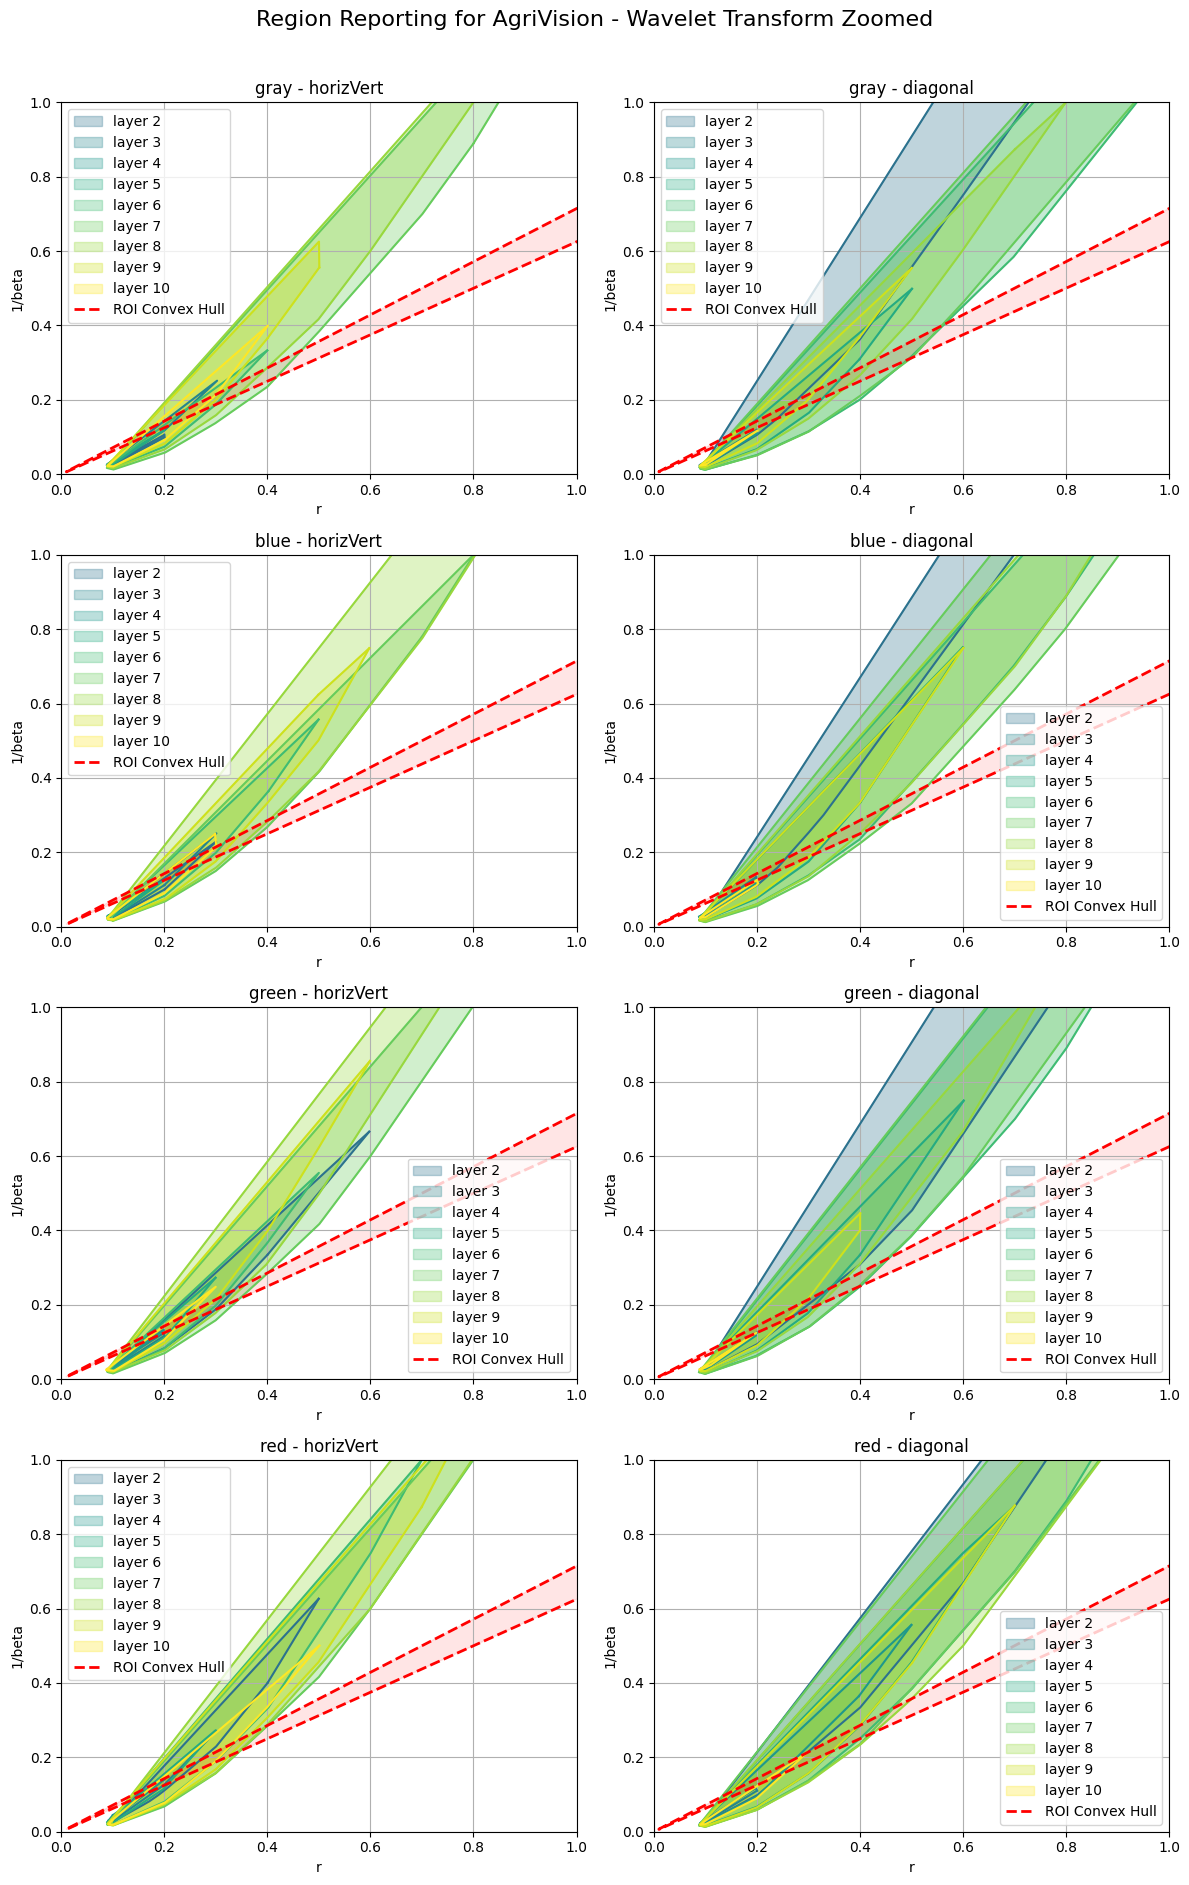

In [114]:
# Find global min/max for all hulls
all_points = np.concatenate([np.array(hull).reshape(-1, 2) for hull in all_hulls_df['hull']])
x_min, x_max = all_points[:, 0].min(), all_points[:, 0].max()
y_min, y_max = all_points[:, 1].min(), all_points[:, 1].max()

channels = all_hulls_df["CHANNEL"].unique()
directions = all_hulls_df["DIRECTION"].unique()

fig, axes = plt.subplots(len(channels), len(directions), figsize=(6 * len(directions), 5 * len(channels)), squeeze=False)

for i, channel in enumerate(channels):
    for j, direction in enumerate(directions):
        ax = axes[i, j]
        subset = all_hulls_df[(all_hulls_df["CHANNEL"] == channel) & (all_hulls_df["DIRECTION"] == direction)]
        if subset.empty:
            ax.set_title(f"{channel} - {direction}\n(No Data)")
            ax.axis('off')
            continue
        max_band = subset["BAND"].astype(int).max()
        colors = plt.cm.viridis(np.linspace(0.3, 1, max_band))
        for _, row in subset.iterrows():
            BAND = int(row['BAND'])
            hull = np.array(row['hull'])
            color = colors[BAND - 1]
            ax.fill(hull[:, 0], hull[:, 1], color=color, alpha=0.3, label=f'{kind} {BAND}')
            ax.plot(hull[:, 0], hull[:, 1], color=color)
            ax.plot([hull[-1, 0], hull[0, 0]], [hull[-1, 1], hull[0, 1]], color=color)
        
        #ADD ROI
        ax.plot(roi_points[roi_hull.vertices, 0], roi_points[roi_hull.vertices, 1], 'r--', lw=2, label='ROI Convex Hull')
        ax.fill(roi_points[roi_hull.vertices, 0], roi_points[roi_hull.vertices, 1], color='red', alpha=0.1)
        ax.plot([roi_points[roi_hull.vertices[-1], 0], roi_points[roi_hull.vertices[0], 0]],
                 [roi_points[roi_hull.vertices[-1], 1], roi_points[roi_hull.vertices[0], 1]],'r--', lw=2)
        

        ax.set_title(f"{channel} - {direction}")
        ax.set_xlabel('r')
        ax.set_ylabel('1/beta')
        ax.legend()
        ax.grid()
        ax.set_xlim(0, 1)
        ax.set_ylim(0, 1)

plt.suptitle(f"Region Reporting for {DATA_SET} - Wavelet Transform Zoomed", fontsize=16, y=0.94)
plt.tight_layout(rect=[0, 0, 1, 0.93])
plt.show()

if SAVE_FIGS:
    save_path = os.path.join(plots_path, f"Region Reporting for {DATA_SET} - Wavelet Transform Zoomed.jpg")
    fig.savefig(save_path, dpi=600, bbox_inches='tight')


## Fourier

In [115]:
kind = "band"
all_hulls_df = pd.DataFrame(columns=["BAND", "hull", "CHANNEL"])
for CHANNEL in ["gray", "blue", "green", "red"]:
    DATA_NAME = f'{DATA_SET}-full' 
    TRANSFORM = f'fourier'
    CHANNEL = CHANNEL

    path_list = DATA_NAME.split("-") + TRANSFORM.split("-")
    
    if CHANNEL:
        path_list.append(CHANNEL)
    print(path_list)
    ROOT_DIR = Path(git.Repo('.', search_parent_directories=True).working_tree_dir)
    CWD = os.path.join(ROOT_DIR, "results", "case-studies", *path_list)


    DICT_PATH = os.path.join(CWD, "cache", "rEtaKsstats_dict.pickle")
    MASTERDF_DIR = os.path.join(CWD, "CSVs", "master_df.csv")
    rEtaKsstats_dict = pd.read_pickle(DICT_PATH)
    master_df = pd.read_csv(MASTERDF_DIR)
    master_df = master_df.set_index(kind)
    master_df
    hulls_df = region_reporting(rEtaKsstats_dict, master_df, layer = "all", kind = kind, MULT =1.2, plots=False, plot_name = "-".join(path_list))
    hulls_df["CHANNEL"] = CHANNEL
    all_hulls_df = pd.concat([all_hulls_df, hulls_df], ignore_index=True)
all_hulls_df = all_hulls_df.reset_index(drop=True)
all_hulls_df

['AgriVision', 'full', 'fourier', 'gray']
['r_optimize', 'eta_optimize', 'ksstat_exclude_plus0']
0.010249958464213726 0.0063984224173442
Layer 2: None Passed
Rational Function Parameters: a=-0.8422862755326657, b=0.15979777406744367, c=-0.0061024974801742, d=-1.5326507196617747, e=0.21643460351127838
Quadratic Function Parameters: a=2.1138925722888056, b=0.006676114982098908, c=0.0010557961669378554
Linear Function Parameters: m=0.6313324858493872, c=-0.039910506556252064
['r_optimize', 'eta_optimize', 'ksstat_exclude_plus0']
0.00907259042753381 0.0039690102483117
Layer 5: None Passed
Rational Function Parameters: a=1217.4871652121326, b=-161.77716563719423, c=4.366963399524802, d=3106.786151458957, e=-296.1775131623209
Quadratic Function Parameters: a=-3.6134966592411106, b=1.1476837654573369, c=-0.05363874223045964
Linear Function Parameters: m=0.3852056048693532, c=-0.013604843111126067
['r_optimize', 'eta_optimize', 'ksstat_exclude_plus0']
0.007771581446246084 0.0031230403979095
La

BAND                                               hull CHANNEL
0     2  [[0.1986852632036751, 0.08619865869064743], [0...    gray
1     5  [[0.10010060411581717, 0.028399207342021622], ...    gray
2     8  [[0.1109085728149082, 0.025381796656891536], [...    gray
3    11  [[0.400267763875082, 0.3341703808410641], [0.0...    gray
4    14  [[0.7003788128840945, 0.7766259094399431], [0....    gray
5    17  [[0.08901712093206063, 0.015510566593482893], ...    gray
6    20  [[0.0883997032028899, 0.018890535764805056], [...    gray
7    23  [[0.2984210031831151, 0.23023513379037877], [0...    gray
8    26  [[0.08980761796801814, 0.024825556517413132], ...    gray
9     2  [[0.39945492982168723, 0.3633622082317218], [0...    blue
10    5  [[0.19824159265132144, 0.11763632535177261], [...    blue
11    8  [[0.3008942833639612, 0.21492056108090848], [0...    blue
12   11  [[0.5014973530184872, 0.4990460082395438], [0....    blue
13   14  [[0.8989536340926638, 1.2860188758402604], [0....    blue
14   17  [[1.0007390550453248, 1.4292184980346876], [0....    blue
15   20  [[0.7009375031786355, 0.875959806980115], [0.0...    blue
16   23  [[0.08948528190584132, 0.01835168901752949], [...    blue
17   26  [[0.0914481337671689, 0.02823402547858538], [0...    blue
18   29  [[0.08872778003307272, 0.031070198070057377], ...    blue
19   32  [[0.11116903110982375, 0.032812718418540505], ...    blue
20    2  [[0.20179172336524023, 0.09668587818088883], [...   green
21    5  [[0.29968836275404165, 0.23085241095185605], [...   green
22    8  [[0.08953613861764186, 0.018775654565625684], ...   green
23   11  [[0.8998341295520733, 1.2854013273211464], [0....   green
24   14  [[0.08889680872235226, 0.01831896279193133], [...   green
25   17  [[0.9986585739384538, 1.4283867208322676], [0....   green
26   20  [[0.4991962426416966, 0.5563373213548872], [0....   green
27   23  [[0.10038431609333977, 0.019774788311540187], ...   green
28   26  [[0.09032256309625589, 0.027470578983121947], ...   green
29   29  [[0.09023947098760778, 0.030829186790938132], ...   green
30   32  [[0.08954131599179717, 0.023874102339993656], ...   green
31    2  [[0.09071368248265177, 0.021730213917440514], ...     red
32    5  [[0.3981494602037754, 0.3628659019305089], [0....     red
33    8  [[0.5987240701536181, 0.6664784534526118], [0....     red
34   11  [[0.08830074053882492, 0.015571791180205618], ...     red
35   14  [[1.300199371641756, 1.85591351085297], [0.088...     red
36   17  [[1.301024092950957, 1.8575524441760152], [0.0...     red
37   20  [[1.1002266009415773, 1.5713152853705197], [0....     red
38   23  [[0.09983478725075491, 0.029709522642986506], ...     red
39   26  [[0.08954563201220868, 0.02156725968637713], [...     red
40   29  [[0.08938428597215933, 0.022959657997670677], ...     red
41   32  [[0.09834068619911679, 0.019463879299464044], ...     red

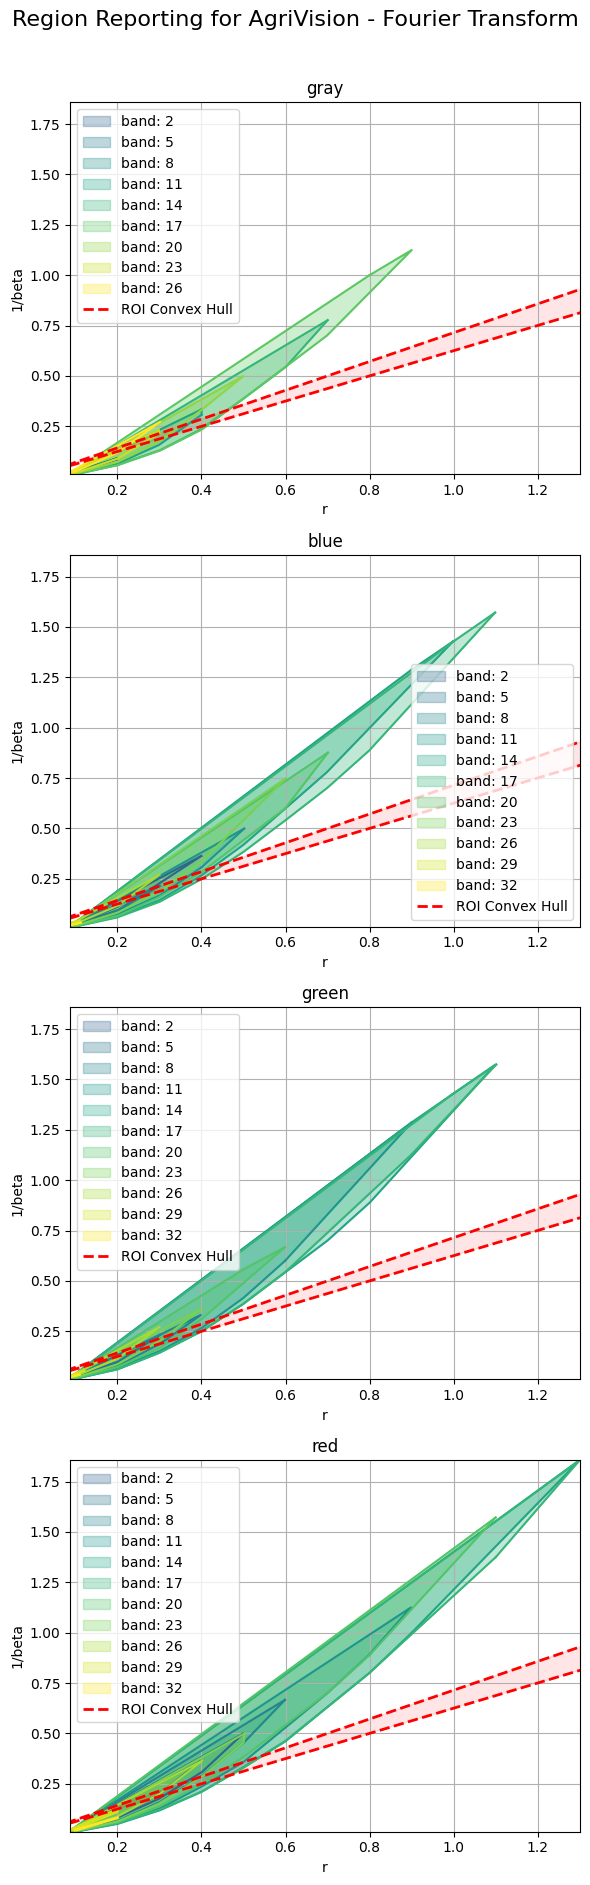

In [116]:
# Find global min/max for all hulls
all_points = np.concatenate([np.array(hull).reshape(-1, 2) for hull in all_hulls_df['hull']])
x_min, x_max = all_points[:, 0].min(), all_points[:, 0].max()
y_min, y_max = all_points[:, 1].min(), all_points[:, 1].max()

channels = all_hulls_df["CHANNEL"].unique()

fig, axes = plt.subplots(len(channels), 1, figsize=(6, 5 * len(channels)), squeeze=False)

for i, channel in enumerate(channels):
    ax = axes[i, 0]
    subset = all_hulls_df[all_hulls_df["CHANNEL"] == channel]
    if subset.empty:
        ax.set_title(f"{channel}\n(No Data)")
        ax.axis('off')
        continue
    max_band = subset["BAND"].astype(int).max()
    colors = plt.cm.viridis(np.linspace(0.3, 1, max_band))
    for _, row in subset.iterrows():
        BAND = int(row['BAND'])
        hull = np.array(row['hull'])
        color = colors[BAND - 1]
        ax.fill(hull[:, 0], hull[:, 1], color=color, alpha=0.3, label=f'{kind}: {BAND}')
        ax.plot(hull[:, 0], hull[:, 1], color=color)
        ax.plot([hull[-1, 0], hull[0, 0]], [hull[-1, 1], hull[0, 1]], color=color)
    #ADD ROI
    ax.plot(roi_points[roi_hull.vertices, 0], roi_points[roi_hull.vertices, 1], 'r--', lw=2, label='ROI Convex Hull')
    ax.fill(roi_points[roi_hull.vertices, 0], roi_points[roi_hull.vertices, 1], color='red', alpha=0.1)
    ax.plot([roi_points[roi_hull.vertices[-1], 0], roi_points[roi_hull.vertices[0], 0]],
                [roi_points[roi_hull.vertices[-1], 1], roi_points[roi_hull.vertices[0], 1]],'r--', lw=2)

    ax.set_title(f"{channel}")
    ax.set_xlabel('r')
    ax.set_ylabel('1/beta')
    ax.legend()
    ax.grid()
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)

plt.suptitle(f"Region Reporting for {DATA_SET} - Fourier Transform", fontsize=16, y=0.94)
plt.tight_layout(rect=[0, 0, 1, 0.93])
plt.show()

if SAVE_FIGS:
    save_path = os.path.join(plots_path, f"Region Reporting for {DATA_SET} - Fourier Transform.jpg")
    fig.savefig(save_path, dpi=600, bbox_inches='tight')


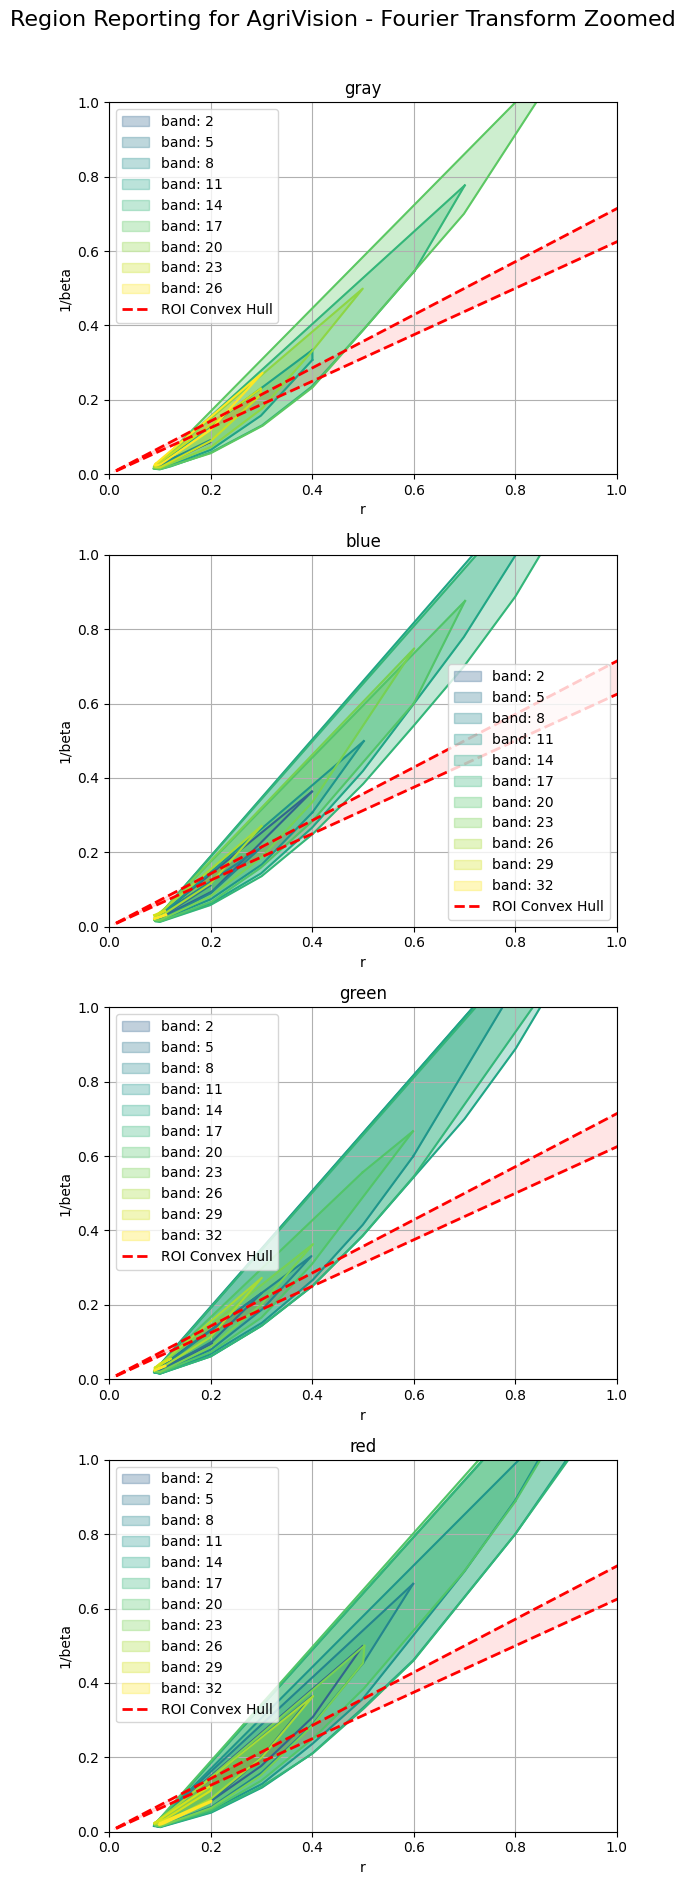

In [117]:
# Find global min/max for all hulls
all_points = np.concatenate([np.array(hull).reshape(-1, 2) for hull in all_hulls_df['hull']])
x_min, x_max = all_points[:, 0].min(), all_points[:, 0].max()
y_min, y_max = all_points[:, 1].min(), all_points[:, 1].max()

channels = all_hulls_df["CHANNEL"].unique()

fig, axes = plt.subplots(len(channels), 1, figsize=(6, 5 * len(channels)), squeeze=False)

for i, channel in enumerate(channels):
    ax = axes[i, 0]
    subset = all_hulls_df[all_hulls_df["CHANNEL"] == channel]
    if subset.empty:
        ax.set_title(f"{channel}\n(No Data)")
        ax.axis('off')
        continue
    max_band = subset["BAND"].astype(int).max()
    colors = plt.cm.viridis(np.linspace(0.3, 1, max_band))
    for _, row in subset.iterrows():
        BAND = int(row['BAND'])
        hull = np.array(row['hull'])
        color = colors[BAND - 1]
        ax.fill(hull[:, 0], hull[:, 1], color=color, alpha=0.3, label=f'{kind}: {BAND}')
        ax.plot(hull[:, 0], hull[:, 1], color=color)
        ax.plot([hull[-1, 0], hull[0, 0]], [hull[-1, 1], hull[0, 1]], color=color)
    #ADD ROI
    ax.plot(roi_points[roi_hull.vertices, 0], roi_points[roi_hull.vertices, 1], 'r--', lw=2, label='ROI Convex Hull')
    ax.fill(roi_points[roi_hull.vertices, 0], roi_points[roi_hull.vertices, 1], color='red', alpha=0.1)
    ax.plot([roi_points[roi_hull.vertices[-1], 0], roi_points[roi_hull.vertices[0], 0]],
                [roi_points[roi_hull.vertices[-1], 1], roi_points[roi_hull.vertices[0], 1]],'r--', lw=2)

    ax.set_title(f"{channel}")
    ax.set_xlabel('r')
    ax.set_ylabel('1/beta')
    ax.legend()
    ax.grid()
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)

plt.suptitle(f"Region Reporting for {DATA_SET} - Fourier Transform Zoomed", fontsize=16, y=0.94)
plt.tight_layout(rect=[0, 0, 1, 0.93])
plt.show()

if SAVE_FIGS:
    save_path = os.path.join(plots_path, f"Region Reporting for {DATA_SET} - Fourier Transform.jpg")
    fig.savefig(save_path, dpi=600, bbox_inches='tight')


# SpaceNet

In [118]:
DATA_SET = "spaceNet"

## Wavelet

In [119]:
kind = "layer"
all_hulls_df = pd.DataFrame(columns=["BAND", "hull", "CHANNEL", "DIRECTION"])
for DIRECTION in ["horizVert", "diagonal"]:
    for CHANNEL in ["gray", "blue", "green", "red"]:
        DATA_NAME = f'{DATA_SET}-full' 
        TRANSFORM = f'wavelet-{DIRECTION}'
        CHANNEL = CHANNEL

        path_list = DATA_NAME.split("-") + TRANSFORM.split("-")
        
        if CHANNEL:
            path_list.append(CHANNEL)
        print(path_list)
        ROOT_DIR = Path(git.Repo('.', search_parent_directories=True).working_tree_dir)
        CWD = os.path.join(ROOT_DIR, "results", "case-studies", *path_list)


        DICT_PATH = os.path.join(CWD, "cache", "rEtaKsstats_dict.pickle")
        MASTERDF_DIR = os.path.join(CWD, "CSVs", "master_df.csv")
        rEtaKsstats_dict = pd.read_pickle(DICT_PATH)
        master_df = pd.read_csv(MASTERDF_DIR)
        master_df = master_df.set_index("layer")
        master_df
        hulls_df = region_reporting(rEtaKsstats_dict, master_df, layer = "all", MULT =1.2, kind = kind, plots=False, plot_name = "-".join(path_list))
        hulls_df["CHANNEL"] = CHANNEL
        hulls_df["DIRECTION"] = DIRECTION
        all_hulls_df = pd.concat([all_hulls_df, hulls_df], ignore_index=True)
all_hulls_df = all_hulls_df.reset_index(drop=True)
all_hulls_df

['spaceNet', 'full', 'wavelet', 'horizVert', 'gray']
['r_optimize', 'eta_optimize', 'ksstat_exclude_plus0']
0.015277196336425146 0.0082273201196278
Layer 2: None Passed
Rational Function Parameters: a=3.7542721114482935, b=2.7019349386613327, c=4.0890555875409777e-07, d=1.8771360515600688, e=1.350967536018421
Quadratic Function Parameters: a=8.259801250273153e-10, b=1.9999999847133123, c=5.4849083095629597e-08
Linear Function Parameters: m=2.0000000000660973, c=-6.025910881390928e-10
['r_optimize', 'eta_optimize', 'ksstat_exclude_plus0']
0.1588799999999997 0.0041152012481055
Layer 3: None Passed
Rational Function Parameters: a=2.0352339344157087, b=1.6327477606267928, c=-0.290479146612548, d=0.9300207706109398, e=0.16676501593920376
Quadratic Function Parameters: a=0.003971148328785867, b=2.195662248191052, c=0.8379809155216753
Linear Function Parameters: m=2.250754229367571, c=0.7521540939332968
['r_optimize', 'eta_optimize', 'ksstat_exclude_plus0']
0.09248399999999969 0.0023519198649

/Users/brandonmarks/Desktop/hierarchical-bayesian-model-validation/utilities/plotting.py:775: OptimizeWarning: Covariance of the parameters could not be estimated
  popt_linear, _ = curve_fit(linear_func, test2["r"], test2["1/beta"], maxfev=10000)


0.015105152835436009 0.000658638529926
Layer 6: None Passed
Rational Function Parameters: a=4.351788131336718, b=-5.502316883443811, c=1.2721354284110573, d=0.996980404083082, e=-0.9640999448230017
Quadratic Function Parameters: a=1.1275765314708364, b=1.153812775655459, c=1.0255773823161962
Linear Function Parameters: m=4.04519165391996, c=-0.8043386960915608
['r_optimize', 'eta_optimize', 'ksstat_exclude_plus0']
0.014892000782864878 0.000329329071013
Layer 7: None Passed
Rational Function Parameters: a=18050.49016527041, b=-10461.270947872601, c=432.31199437047337, d=5030.842795007452, e=-2636.2295475886654
Quadratic Function Parameters: a=-0.4639207161593195, b=4.655339389299992, c=-0.8368900088088158
Linear Function Parameters: m=3.7866035329588414, c=-0.43925586282552675
['r_optimize', 'eta_optimize', 'ksstat_exclude_plus0']
0.011936296612367692 0.0001646669863926
Layer 8: None Passed
['r_optimize', 'eta_optimize', 'ksstat_exclude_plus0']
0.008283567048437112 8.233410583957582e-05

/Users/brandonmarks/Desktop/hierarchical-bayesian-model-validation/utilities/plotting.py:772: OptimizeWarning: Covariance of the parameters could not be estimated
  popt_quadratic, _ = curve_fit(quadratic_func, test2["r"], test2["1/beta"], maxfev=10000)
/Users/brandonmarks/Desktop/hierarchical-bayesian-model-validation/utilities/plotting.py:775: OptimizeWarning: Covariance of the parameters could not be estimated
  popt_linear, _ = curve_fit(linear_func, test2["r"], test2["1/beta"], maxfev=10000)


BAND                                               hull CHANNEL  DIRECTION
0     2  [[20.00137502058616, 39.99904989267944], [18.9...    gray  horizVert
1     3  [[20.001658046729087, 66.66638816688977], [20....    gray  horizVert
2     4  [[20.000506009695894, 50.00007264818519], [20....    gray  horizVert
3     5  [[20.000585277736043, 66.66458335064385], [19....    gray  horizVert
4     6  [[1.0702591326812163, 3.5678489845128487], [1....    gray  horizVert
..  ...                                                ...     ...        ...
57    5  [[20.00178536397578, 50.00100298481483], [20.0...     red   diagonal
58    6  [[8.197357241224834, 27.335109945548847], [2.9...     red   diagonal
59    7  [[0.5992017328515366, 1.539328779927743], [0.5...     red   diagonal
60    8  [[0.09909115822527383, 0.04162199667481063], [...     red   diagonal
61    9  [[0.6010420896366397, 0.6820229026430783], [0....     red   diagonal

[62 rows x 4 columns]

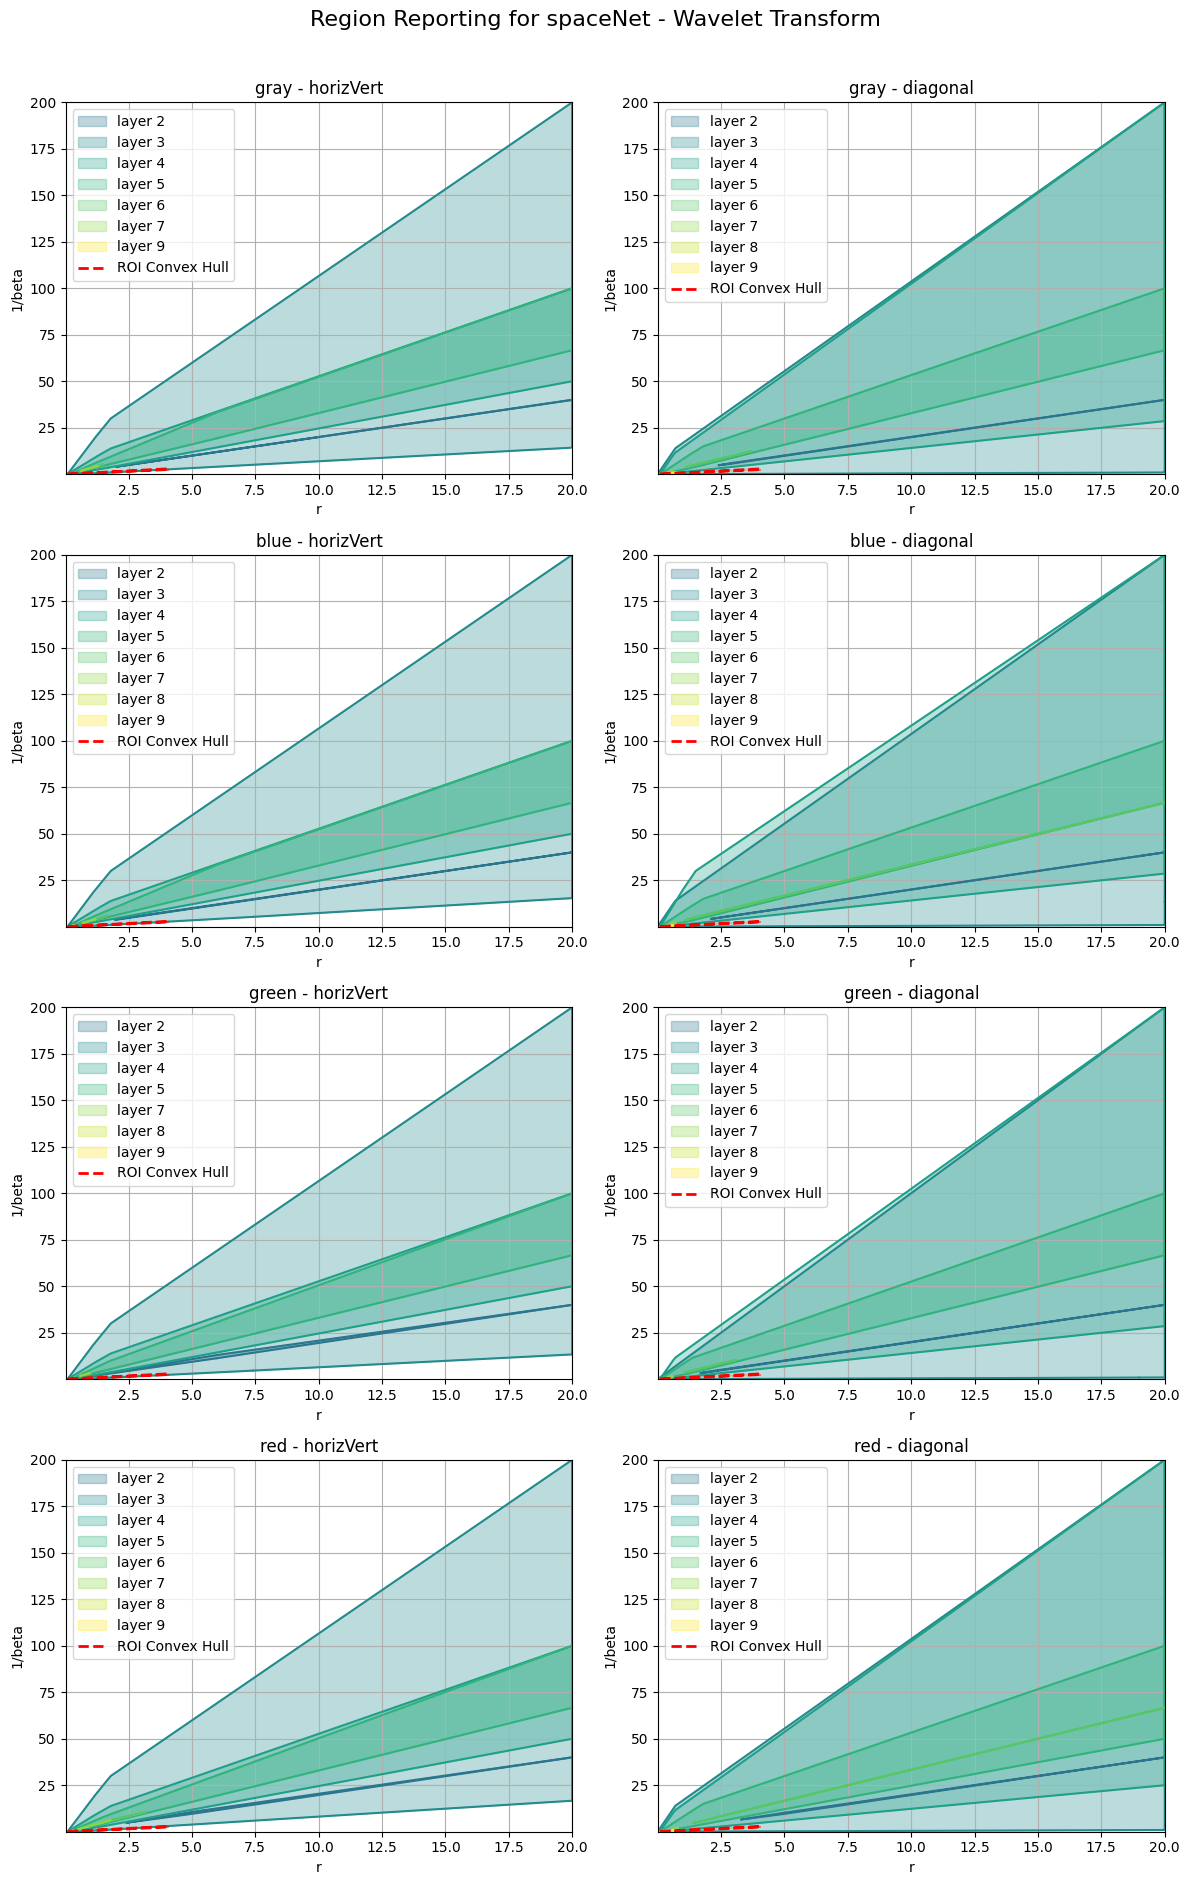

In [120]:
# Find global min/max for all hulls
all_points = np.concatenate([np.array(hull).reshape(-1, 2) for hull in all_hulls_df['hull']])
x_min, x_max = all_points[:, 0].min(), all_points[:, 0].max()
y_min, y_max = all_points[:, 1].min(), all_points[:, 1].max()

channels = all_hulls_df["CHANNEL"].unique()
directions = all_hulls_df["DIRECTION"].unique()

fig, axes = plt.subplots(len(channels), len(directions), figsize=(6 * len(directions), 5 * len(channels)), squeeze=False)

for i, channel in enumerate(channels):
    for j, direction in enumerate(directions):
        ax = axes[i, j]
        subset = all_hulls_df[(all_hulls_df["CHANNEL"] == channel) & (all_hulls_df["DIRECTION"] == direction)]
        if subset.empty:
            ax.set_title(f"{channel} - {direction}\n(No Data)")
            ax.axis('off')
            continue
        max_band = subset["BAND"].astype(int).max()
        colors = plt.cm.viridis(np.linspace(0.3, 1, max_band))
        for _, row in subset.iterrows():
            BAND = int(row['BAND'])
            hull = np.array(row['hull'])
            color = colors[BAND - 1]
            ax.fill(hull[:, 0], hull[:, 1], color=color, alpha=0.3, label=f'{kind} {BAND}')
            ax.plot(hull[:, 0], hull[:, 1], color=color)
            ax.plot([hull[-1, 0], hull[0, 0]], [hull[-1, 1], hull[0, 1]], color=color)

        
        
        #ADD ROI
        ax.plot(roi_points[roi_hull.vertices, 0], roi_points[roi_hull.vertices, 1], 'r--', lw=2, label='ROI Convex Hull')
        ax.fill(roi_points[roi_hull.vertices, 0], roi_points[roi_hull.vertices, 1], color='red', alpha=0.1)
        ax.plot([roi_points[roi_hull.vertices[-1], 0], roi_points[roi_hull.vertices[0], 0]],
                 [roi_points[roi_hull.vertices[-1], 1], roi_points[roi_hull.vertices[0], 1]],'r--', lw=2)

        
        ax.set_title(f"{channel} - {direction}")
        ax.set_xlabel('r')
        ax.set_ylabel('1/beta')
        ax.legend()
        ax.grid()
        ax.set_xlim(x_min, x_max)
        ax.set_ylim(y_min, y_max)

plt.suptitle(f"Region Reporting for {DATA_SET} - Wavelet Transform", fontsize=16, y=0.94)
plt.tight_layout(rect=[0, 0, 1, 0.93])
plt.show()
if SAVE_FIGS:
    save_path = os.path.join(plots_path, f"Region Reporting for {DATA_SET} - Wavelet Transform.jpg")
    fig.savefig(save_path, dpi=600, bbox_inches='tight')


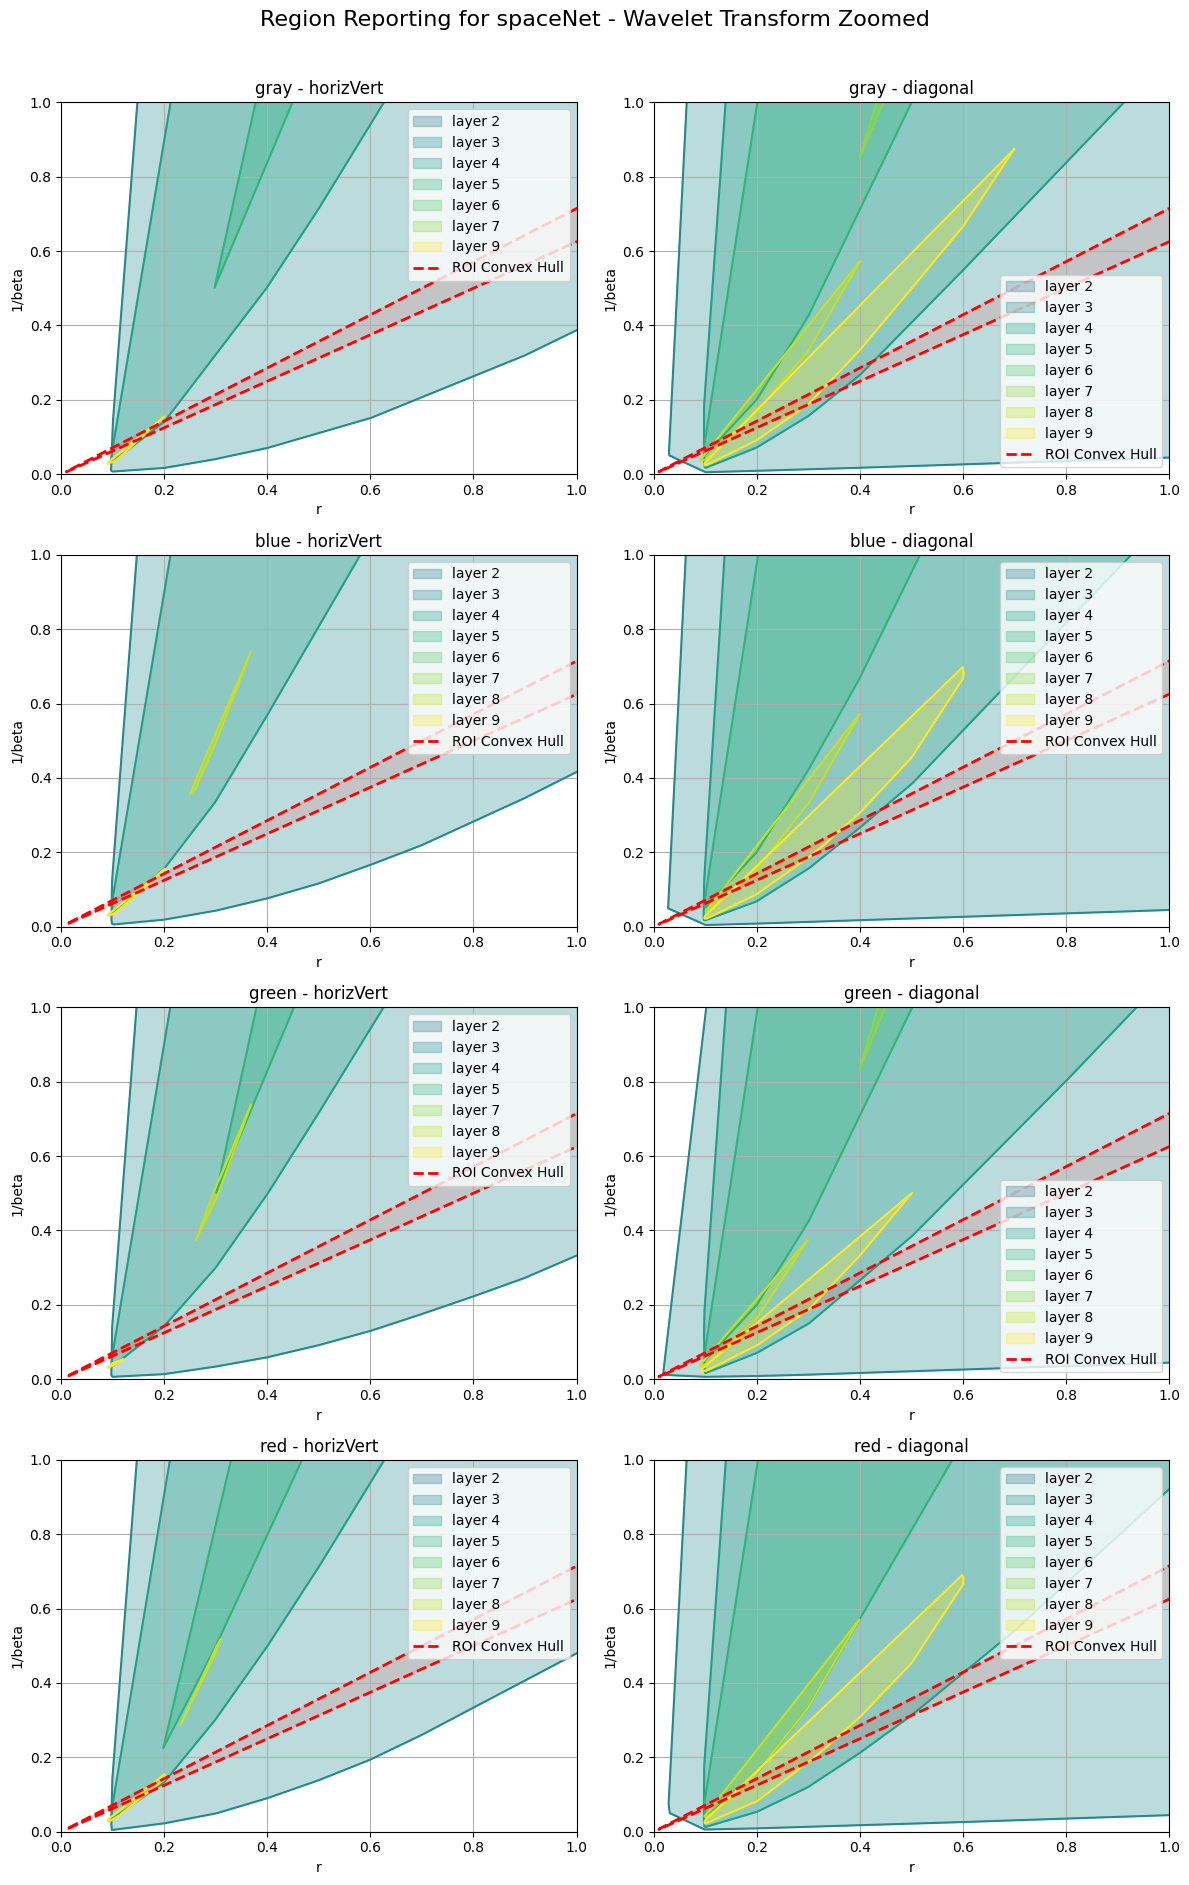

In [121]:
# Find global min/max for all hulls
all_points = np.concatenate([np.array(hull).reshape(-1, 2) for hull in all_hulls_df['hull']])
x_min, x_max = all_points[:, 0].min(), all_points[:, 0].max()
y_min, y_max = all_points[:, 1].min(), all_points[:, 1].max()

channels = all_hulls_df["CHANNEL"].unique()
directions = all_hulls_df["DIRECTION"].unique()

fig, axes = plt.subplots(len(channels), len(directions), figsize=(6 * len(directions), 5 * len(channels)), squeeze=False)

for i, channel in enumerate(channels):
    for j, direction in enumerate(directions):
        ax = axes[i, j]
        subset = all_hulls_df[(all_hulls_df["CHANNEL"] == channel) & (all_hulls_df["DIRECTION"] == direction)]
        if subset.empty:
            ax.set_title(f"{channel} - {direction}\n(No Data)")
            ax.axis('off')
            continue
        max_band = subset["BAND"].astype(int).max()
        colors = plt.cm.viridis(np.linspace(0.3, 1, max_band))
        for _, row in subset.iterrows():
            BAND = int(row['BAND'])
            hull = np.array(row['hull'])
            color = colors[BAND - 1]
            ax.fill(hull[:, 0], hull[:, 1], color=color, alpha=0.3, label=f'{kind} {BAND}')
            ax.plot(hull[:, 0], hull[:, 1], color=color)
            ax.plot([hull[-1, 0], hull[0, 0]], [hull[-1, 1], hull[0, 1]], color=color)
        
        #ADD ROI
        ax.plot(roi_points[roi_hull.vertices, 0], roi_points[roi_hull.vertices, 1], 'r--', lw=2, label='ROI Convex Hull')
        ax.fill(roi_points[roi_hull.vertices, 0], roi_points[roi_hull.vertices, 1], color='red', alpha=0.1)
        ax.plot([roi_points[roi_hull.vertices[-1], 0], roi_points[roi_hull.vertices[0], 0]],
                 [roi_points[roi_hull.vertices[-1], 1], roi_points[roi_hull.vertices[0], 1]],'r--', lw=2)
        

        ax.set_title(f"{channel} - {direction}")
        ax.set_xlabel('r')
        ax.set_ylabel('1/beta')
        ax.legend()
        ax.grid()
        ax.set_xlim(0, 1)
        ax.set_ylim(0, 1)

plt.suptitle(f"Region Reporting for {DATA_SET} - Wavelet Transform Zoomed", fontsize=16, y=0.94)
plt.tight_layout(rect=[0, 0, 1, 0.93])
plt.show()

if SAVE_FIGS:
    save_path = os.path.join(plots_path, f"Region Reporting for {DATA_SET} - Wavelet Transform Zoomed.jpg")
    fig.savefig(save_path, dpi=600, bbox_inches='tight')


## Fourier

In [122]:
kind = "band"
all_hulls_df = pd.DataFrame(columns=["BAND", "hull", "CHANNEL"])
for CHANNEL in ["gray", "blue", "green", "red"]:
    DATA_NAME = f'{DATA_SET}-full' 
    TRANSFORM = f'fourier'
    CHANNEL = CHANNEL

    path_list = DATA_NAME.split("-") + TRANSFORM.split("-")
    
    if CHANNEL:
        path_list.append(CHANNEL)
    print(path_list)
    ROOT_DIR = Path(git.Repo('.', search_parent_directories=True).working_tree_dir)
    CWD = os.path.join(ROOT_DIR, "results", "case-studies", *path_list)


    DICT_PATH = os.path.join(CWD, "cache", "rEtaKsstats_dict.pickle")
    MASTERDF_DIR = os.path.join(CWD, "CSVs", "master_df.csv")
    rEtaKsstats_dict = pd.read_pickle(DICT_PATH)
    master_df = pd.read_csv(MASTERDF_DIR)
    master_df = master_df.set_index(kind)
    master_df
    hulls_df = region_reporting(rEtaKsstats_dict, master_df, layer = "all", kind = kind, MULT =1.2, plots=False, plot_name = "-".join(path_list))
    hulls_df["CHANNEL"] = CHANNEL
    all_hulls_df = pd.concat([all_hulls_df, hulls_df], ignore_index=True)
all_hulls_df = all_hulls_df.reset_index(drop=True)
all_hulls_df

['spaceNet', 'full', 'fourier', 'gray']
['r_optimize', 'eta_optimize', 'ksstat_exclude_plus0']
0.007805916687342207 0.0062204080553092
Layer 2: None Passed
Rational Function Parameters: a=190.68756761536835, b=68.24601189342802, c=30.758034910660353, d=110.79287491236224, e=90.1304525168647
Quadratic Function Parameters: a=0.0006464923177953441, b=1.6871673932521265, c=-0.4329158529464532
Linear Function Parameters: m=1.6979631202282397, c=-0.4641971397117156
['r_optimize', 'eta_optimize', 'ksstat_exclude_plus0']
0.010007283707753833 0.0042501094782857
Layer 5: None Passed
Rational Function Parameters: a=-0.4916546648383153, b=5.719920457090239, c=-1.6474364166985633, d=-0.015565186022021022, e=2.3511894901041708
Quadratic Function Parameters: a=-0.19955509639514837, b=2.438583681077917, c=-0.7060008674466636
Linear Function Parameters: m=1.7772708005494853, c=-0.17645864138087797
['r_optimize', 'eta_optimize', 'ksstat_exclude_plus0']
0.008400108753748813 0.0023762874939549
Layer 8: No

BAND                                               hull CHANNEL
0     2  [[20.00015786953322, 33.33354718737642], [2.99...    gray
1     5  [[1.1009681785522696, 1.8343150477075427], [0....    gray
2     8  [[1.9302728362301889, 3.21692463118205], [1.90...    gray
3    11  [[0.5009736527581616, 0.554290237040779], [0.6...    gray
4    14  [[2.299755049535943, 4.600961389144486], [1.10...    gray
5    17  [[0.09816497135107037, 0.021462657141913147], ...    gray
6    20  [[0.9009506654216701, 1.2850598942805311], [0....    gray
7    23  [[1.1006032575145683, 1.3737011668254417], [0....    gray
8     2  [[5.799539278896146, 8.286426214545823], [19.9...    blue
9     5  [[1.7002049285880148, 3.0906188019124783], [0....    blue
10    8  [[2.800683827280372, 4.665720653999504], [4.70...    blue
11   11  [[0.5018818796750859, 0.556759036254743], [0.5...    blue
12   14  [[2.4010021925541243, 4.80145462187779], [0.29...    blue
13   17  [[0.09789069490044096, 0.021790540139850472], ...    blue
14   20  [[0.09654946100856043, 0.01662608843049242], [...    blue
15   23  [[1.5980143818422838, 1.5990547012721699], [20...    blue
16    2  [[19.999055663095636, 33.33271287956806], [3.0...   green
17    5  [[0.7966150247211473, 1.14405130899021], [0.89...   green
18    8  [[0.6983984066859797, 1.0009114177131004], [0....   green
19   11  [[0.4003433562826632, 0.36316440205591066], [0...   green
20   14  [[2.7001683066728828, 5.401371182834895], [1.8...   green
21   17  [[0.09881317932851534, 0.025930881467153746], ...   green
22   20  [[1.2996119572619087, 1.8595513651532132], [0....   green
23   23  [[2.3994729842516866, 3.4273171587294295], [0....   green
24    2  [[1.4985131185049025, 2.5010128692553586], [0....     red
25    5  [[1.0987762672623294, 1.8333381100390642], [0....     red
26    8  [[0.39982071655341156, 0.33474419455029314], [...     red
27   11  [[0.29932135611001387, 0.19885136976649598], [...     red
28   14  [[2.899665741612157, 5.799431853504441], [0.19...     red
29   17  [[0.9995710934969602, 1.6667087490196737], [0....     red
30   20  [[0.08826788715949534, 0.0165999227460617], [0...     red
31   23  [[4.0007363927262425, 5.714547479183128], [0.0...     red

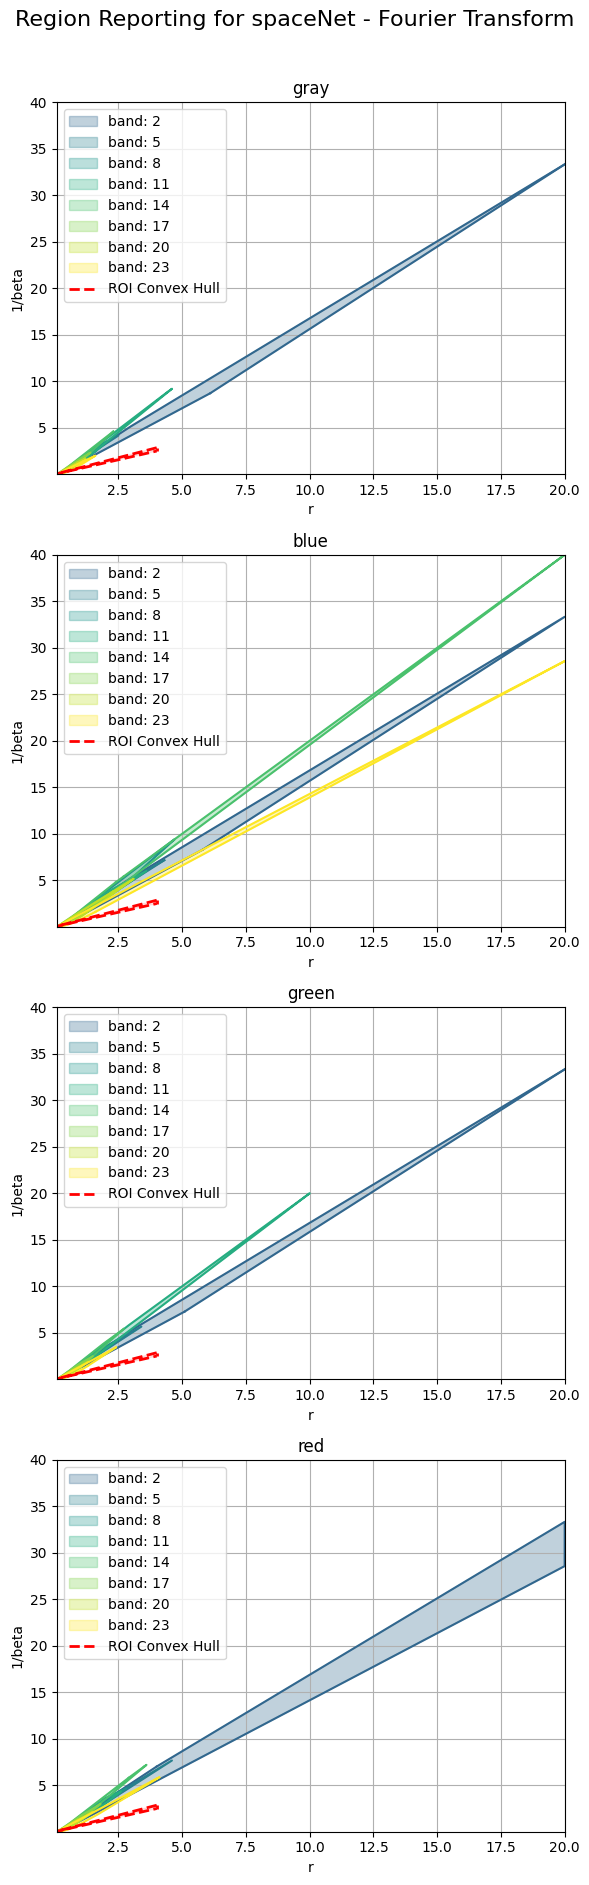

In [123]:
# Find global min/max for all hulls
all_points = np.concatenate([np.array(hull).reshape(-1, 2) for hull in all_hulls_df['hull']])
x_min, x_max = all_points[:, 0].min(), all_points[:, 0].max()
y_min, y_max = all_points[:, 1].min(), all_points[:, 1].max()

channels = all_hulls_df["CHANNEL"].unique()

fig, axes = plt.subplots(len(channels), 1, figsize=(6, 5 * len(channels)), squeeze=False)

for i, channel in enumerate(channels):
    ax = axes[i, 0]
    subset = all_hulls_df[all_hulls_df["CHANNEL"] == channel]
    if subset.empty:
        ax.set_title(f"{channel}\n(No Data)")
        ax.axis('off')
        continue
    max_band = subset["BAND"].astype(int).max()
    colors = plt.cm.viridis(np.linspace(0.3, 1, max_band))
    for _, row in subset.iterrows():
        BAND = int(row['BAND'])
        hull = np.array(row['hull'])
        color = colors[BAND - 1]
        ax.fill(hull[:, 0], hull[:, 1], color=color, alpha=0.3, label=f'{kind}: {BAND}')
        ax.plot(hull[:, 0], hull[:, 1], color=color)
        ax.plot([hull[-1, 0], hull[0, 0]], [hull[-1, 1], hull[0, 1]], color=color)
    #ADD ROI
    ax.plot(roi_points[roi_hull.vertices, 0], roi_points[roi_hull.vertices, 1], 'r--', lw=2, label='ROI Convex Hull')
    ax.fill(roi_points[roi_hull.vertices, 0], roi_points[roi_hull.vertices, 1], color='red', alpha=0.1)
    ax.plot([roi_points[roi_hull.vertices[-1], 0], roi_points[roi_hull.vertices[0], 0]],
                [roi_points[roi_hull.vertices[-1], 1], roi_points[roi_hull.vertices[0], 1]],'r--', lw=2)

    ax.set_title(f"{channel}")
    ax.set_xlabel('r')
    ax.set_ylabel('1/beta')
    ax.legend()
    ax.grid()
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)

plt.suptitle(f"Region Reporting for {DATA_SET} - Fourier Transform", fontsize=16, y=0.94)
plt.tight_layout(rect=[0, 0, 1, 0.93])
plt.show()

if SAVE_FIGS:
    save_path = os.path.join(plots_path, f"Region Reporting for {DATA_SET} - Fourier Transform.jpg")
    fig.savefig(save_path, dpi=600, bbox_inches='tight')


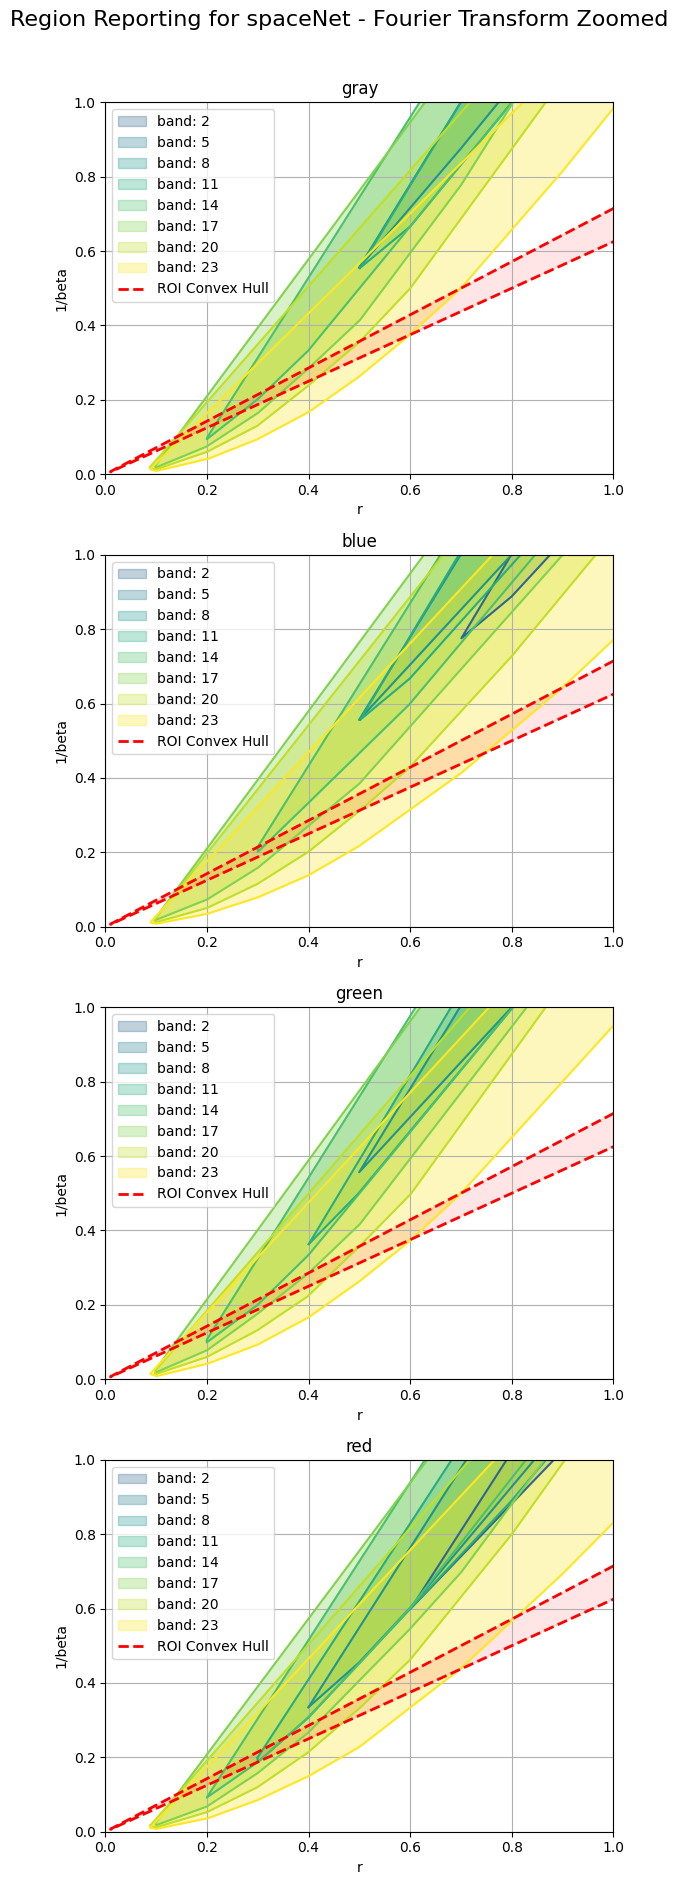

In [124]:
# Find global min/max for all hulls
all_points = np.concatenate([np.array(hull).reshape(-1, 2) for hull in all_hulls_df['hull']])
x_min, x_max = all_points[:, 0].min(), all_points[:, 0].max()
y_min, y_max = all_points[:, 1].min(), all_points[:, 1].max()

channels = all_hulls_df["CHANNEL"].unique()

fig, axes = plt.subplots(len(channels), 1, figsize=(6, 5 * len(channels)), squeeze=False)

for i, channel in enumerate(channels):
    ax = axes[i, 0]
    subset = all_hulls_df[all_hulls_df["CHANNEL"] == channel]
    if subset.empty:
        ax.set_title(f"{channel}\n(No Data)")
        ax.axis('off')
        continue
    max_band = subset["BAND"].astype(int).max()
    colors = plt.cm.viridis(np.linspace(0.3, 1, max_band))
    for _, row in subset.iterrows():
        BAND = int(row['BAND'])
        hull = np.array(row['hull'])
        color = colors[BAND - 1]
        ax.fill(hull[:, 0], hull[:, 1], color=color, alpha=0.3, label=f'{kind}: {BAND}')
        ax.plot(hull[:, 0], hull[:, 1], color=color)
        ax.plot([hull[-1, 0], hull[0, 0]], [hull[-1, 1], hull[0, 1]], color=color)
    #ADD ROI
    ax.plot(roi_points[roi_hull.vertices, 0], roi_points[roi_hull.vertices, 1], 'r--', lw=2, label='ROI Convex Hull')
    ax.fill(roi_points[roi_hull.vertices, 0], roi_points[roi_hull.vertices, 1], color='red', alpha=0.1)
    ax.plot([roi_points[roi_hull.vertices[-1], 0], roi_points[roi_hull.vertices[0], 0]],
                [roi_points[roi_hull.vertices[-1], 1], roi_points[roi_hull.vertices[0], 1]],'r--', lw=2)

    ax.set_title(f"{channel}")
    ax.set_xlabel('r')
    ax.set_ylabel('1/beta')
    ax.legend()
    ax.grid()
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)

plt.suptitle(f"Region Reporting for {DATA_SET} - Fourier Transform Zoomed", fontsize=16, y=0.94)
plt.tight_layout(rect=[0, 0, 1, 0.93])
plt.show()

if SAVE_FIGS:
    save_path = os.path.join(plots_path, f"Region Reporting for {DATA_SET} - Fourier Transform.jpg")
    fig.savefig(save_path, dpi=600, bbox_inches='tight')
